In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from umap import UMAP
import pacmap
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from umap import UMAP
from sklearn.impute import SimpleImputer
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## UMAP using DNA only features

In [3]:
cols=['Shear', 'Stagger', "Stretch",'Propeller','Opening']
df1=pd.read_csv('Sp_NA_csvs/sp_nat_all.csv')
df2=pd.read_csv('Sp_NA_csvs/sp_mm20_all_bps.csv')
df3=pd.read_csv('Sp_NA_csvs/sp_16_19_all_bps.csv')
df4=pd.read_csv('Sp_NA_csvs/sp_mm17-20_all_bps.csv')
df2.head()

,sp_mm20_shear_20,sp_mm20_stretch_20,sp_mm20_stagger_20,sp_mm20_buckle_20,sp_mm20_propeller_20,sp_mm20_opening_20,sp_mm20_shear_19,sp_mm20_stretch_19,sp_mm20_stagger_19,sp_mm20_buckle_19,...,sp_mm20_stagger_18,sp_mm20_buckle_18,sp_mm20_propeller_18,sp_mm20_opening_18,sp_mm20_shear_17,sp_mm20_stretch_17,sp_mm20_stagger_17,sp_mm20_buckle_17,sp_mm20_propeller_17,sp_mm20_opening_17
0,-9.31,4.19,-0.28,-49.06,9.69,-5.20,-2.49,2.91,1.24,6.23,...,0.15,-19.60,12.59,11.02,0.72,-0.15,-2.41,-21.84,-28.58,-11.97
1,-8.62,4.62,-1.55,-29.20,35.87,-20.32,-2.54,2.79,0.59,-5.19,...,0.42,-22.69,12.25,7.34,0.71,0.23,-2.44,-23.45,-14.65,-3.42
2,-7.99,3.80,0.06,-28.76,47.50,-4.65,-2.56,2.58,0.84,-20.47,...,-0.08,-43.79,-12.12,-5.15,0.03,-0.01,-0.18,-7.25,9.58,-5.04
3,-8.02,4.69,0.51,-27.75,35.87,22.35,-2.52,3.61,0.29,-17.07,...,0.09,-26.50,15.08,9.28,-0.43,-0.02,-0.94,3.66,16.36,0.58
4,-8.71,5.50,2.16,-24.75,-0.86,-61.05,-3.02,2.24,0.30,-15.06,...,-0.09,-21.39,11.87,0.62,-0.22,-0.12,-0.49,-7.73,16.48,-3.83


In [4]:
df4.columns

Index(['sp_mm17-20_shear_20', 'sp_mm17-20_stretch_20', 'sp_mm17-20_stagger_20',
       'sp_mm17-20_buckle_20', 'sp_mm17-20_propeller_20',
       'sp_mm17-20_opening_20', 'sp_mm17-20_shear_19', 'sp_mm17-20_stretch_19',
       'sp_mm17-20_stagger_19', 'sp_mm17-20_buckle_19',
       'sp_mm17-20_propeller_19', 'sp_mm17-20_opening_19',
       'sp_mm17-20_shear_18', 'sp_mm17-20_stretch_18', 'sp_mm17-20_stagger_18',
       'sp_mm17-20_buckle_18', 'sp_mm17-20_propeller_18',
       'sp_mm17-20_opening_18', 'sp_mm17-20_shear_17', 'sp_mm17-20_stretch_17',
       'sp_mm17-20_stagger_17', 'sp_mm17-20_buckle_17',
       'sp_mm17-20_propeller_17', 'sp_mm17-20_opening_17'],
      dtype='object')

In [5]:
# Drop major and minor width columns from the dataframe
#df1=df1.drop(columns=['sp_rd_16_shear','sp_rd_16_stretch','sp_rd_16_stagger','sp_rd_16_buckle', 'sp_rd_16_propeller', 'sp_rd_16_opening'])
df1=df1.drop(columns=['sp_20_major','sp_20_minor','sp_19_major','sp_19_minor','sp_18_major','sp_18_minor','sp_17_major','sp_17_minor'])
# df2=df3.drop(columns=['spmm20_20_major','spmm20_20_minor','spmm20_19_major','spmm20_19_minor','spmm20_18_major','spmm20_18_minor','spmm20_17_major','spmm20_17_minor'])
name=[*list(df1.columns)]
#name

In [6]:
#li_rd=[]
li_nat=[]
li_mm20=[]
li_mm16_19=[]
li_mm17_20=[]

print(len(df1), len(df2),len(df3),len(df4)) 

df1.columns = range(df1.shape[1])
df2.columns = range(df2.shape[1])
df3.columns = range(df3.shape[1])
df4.columns = range(df4.shape[1])

# for i in range(len(df1)):
#    li_rd.append('Sp_RNA_DNA')

for i in range(len(df1)):
    li_nat.append('Sp_native')

for i in range(len(df2)):
    li_mm20.append('Sp_mm20')

for i in range(len(df3)):
    li_mm16_19.append('Sp_mm16_19')
    
for i in range(len(df4)):
    li_mm17_20.append('Sp_mm17-20')
    

#df1['Labels']=li_rd
df1['Labels']=li_nat
df2['Labels']=li_mm20
df3['Labels']=li_mm16_19
df4['Labels']=li_mm17_20


print(len(df1), len(df2),len(df3), len(df4))

944 558 308 1115
944 558 308 1115


In [7]:
dfs=[df1,df2,df3,df4]
sp_df=pd.concat(dfs)
sp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Labels
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,3.3395,6.6069,6.6553,-0.4333,-0.1624,0.7862,22.2872,31.1506,-1.1153,Sp_native
1,-1.9338,-0.2674,-0.5556,-27.4271,-2.9507,-1.4088,-1.1249,-2.0598,-0.4141,163.8870,...,3.6978,1.2315,2.2936,-0.2467,-0.0627,0.2854,15.8367,21.5744,0.2816,Sp_native
2,-1.9522,-0.3215,-1.5388,-37.7302,0.1344,-4.8676,0.0000,0.0000,0.0000,0.0000,...,-12.1020,14.0883,-0.1628,0.2160,0.0381,-0.1403,23.2042,19.3277,-1.7907,Sp_native
3,-1.6764,-0.2989,-2.2130,-41.6397,3.3360,-12.7670,-0.3408,-0.8056,-0.0288,144.4887,...,-16.5550,-5.0665,2.4141,-0.0148,0.0068,0.9877,-5.3736,40.7062,-3.4361,Sp_native
4,-2.0473,-0.4995,-1.2528,-29.2144,5.8491,-10.4067,-0.6070,-1.5472,-0.0846,150.0707,...,2.8481,6.4141,6.6592,0.0221,-0.0568,0.4948,23.8849,25.0668,-3.6689,Sp_native


In [8]:
# Save dataframe
name=['sp_all_bp20_shear','sp_all_bp20_stretch','sp_all_bp20_stagger','sp_all_bp20_buckle','sp_all_bp20_propeller','sp_all_bp20_opening','sp_all_bp19_shear','sp_all_bp19_stretch','sp_all_bp19_stagger','sp_all_bp19_buckle','sp_all_bp19_propeller','sp_all_bp19_opening','sp_all_bp18_shear','sp_all_bp18_stretch','sp_all_bp18_stagger','sp_all_bp18_buckle','sp_all_bp18_propeller','sp_all_bp18_opening','sp_all_bp17_shear','sp_all_bp17_stretch','sp_all_bp17_stagger','sp_all_bp17_buckle','sp_all_bp17_propeller','sp_all_bp17_opening','Label']
sp_na=pd.DataFrame()
sp_na=pd.concat([df1,df2,df3,df4])
sp_na.columns=name
sp_na.to_csv('native_non-native_conts/SpCas9-NA-str-prop.csv', index=False)

In [9]:
print(sp_df.info())
# sp_df=sp_df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 1114
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1361 non-null   float64
 1   1       1361 non-null   float64
 2   2       1361 non-null   float64
 3   3       1361 non-null   float64
 4   4       1361 non-null   float64
 5   5       1361 non-null   float64
 6   6       2915 non-null   float64
 7   7       2915 non-null   float64
 8   8       2915 non-null   float64
 9   9       2915 non-null   float64
 10  10      2915 non-null   float64
 11  11      2915 non-null   float64
 12  12      1597 non-null   float64
 13  13      1597 non-null   float64
 14  14      1597 non-null   float64
 15  15      1597 non-null   float64
 16  16      1597 non-null   float64
 17  17      1597 non-null   float64
 18  18      1323 non-null   float64
 19  19      1323 non-null   float64
 20  20      1323 non-null   float64
 21  21      1323 non-null   float64
 22  

In [10]:
from umap import UMAP
import plotly.express as px
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler=StandardScaler()

## Pair-wise Silhoute Score calculation

In [243]:
sp_nat20=pd.concat([df1,df2])
sp_nat16_19=pd.concat([df1,df3])
sp_nat17_20=pd.concat([df1,df4])
sp_nat20.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Labels
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,3.3395,6.6069,6.6553,-0.4333,-0.1624,0.7862,22.2872,31.1506,-1.1153,Sp_native
1,-1.9338,-0.2674,-0.5556,-27.4271,-2.9507,-1.4088,-1.1249,-2.0598,-0.4141,163.8870,...,3.6978,1.2315,2.2936,-0.2467,-0.0627,0.2854,15.8367,21.5744,0.2816,Sp_native
2,-1.9522,-0.3215,-1.5388,-37.7302,0.1344,-4.8676,0.0000,0.0000,0.0000,0.0000,...,-12.1020,14.0883,-0.1628,0.2160,0.0381,-0.1403,23.2042,19.3277,-1.7907,Sp_native
3,-1.6764,-0.2989,-2.2130,-41.6397,3.3360,-12.7670,-0.3408,-0.8056,-0.0288,144.4887,...,-16.5550,-5.0665,2.4141,-0.0148,0.0068,0.9877,-5.3736,40.7062,-3.4361,Sp_native
4,-2.0473,-0.4995,-1.2528,-29.2144,5.8491,-10.4067,-0.6070,-1.5472,-0.0846,150.0707,...,2.8481,6.4141,6.6592,0.0221,-0.0568,0.4948,23.8849,25.0668,-3.6689,Sp_native


In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from umap import UMAP

def find_best_umap_parameters(df_fn_all):
    # Assuming you have your data stored in 'df_fn_all'
    # import plotly.express as px
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(df_fn_all.iloc[:, :-2]))

    # Define the range of values for n_neighbors and min_dist
    n_neighbors_values = list(np.arange(100, 200, 5))  # Modify as desired
    min_dist_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Modify as desired

    best_silhouette_score = float('-inf')
    best_n_neighbors = None
    best_min_dist = None

    for n_neighbors in n_neighbors_values:
        for min_dist in min_dist_values:
            umap_2d = UMAP(n_components=2, init='random', random_state=0,
                           n_neighbors=n_neighbors, min_dist=min_dist, metric='manhattan')
            fn_umap = umap_2d.fit_transform(segmentation_std)
            df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
            #df_umap['Label'] = df_fn_all.iloc[:, -1]
            scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
            silhouette = silhouette_score(scores_umap, df_fn_all.iloc[:, -1], metric='manhattan')

            print(f"n_neighbors: {n_neighbors}, min_dist: {min_dist}, Silhouette Score: {silhouette}")

            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_n_neighbors = n_neighbors
                best_min_dist = min_dist

    print("Best Silhouette Score:", best_silhouette_score)
    print("Best n_neighbors:", best_n_neighbors)
    print("Best min_dist:", best_min_dist)

# Example usage:
# df_fn_all = ...  # Your data frame
# find_best_umap_parameters(df_fn_all)


In [447]:
find_best_umap_parameters(sp_df)

n_neighbors: 100, min_dist: 0.0, Silhouette Score: 0.5090362906603006
n_neighbors: 100, min_dist: 0.1, Silhouette Score: 0.3902233814587059
n_neighbors: 100, min_dist: 0.2, Silhouette Score: 0.3584772075402267
n_neighbors: 100, min_dist: 0.3, Silhouette Score: 0.3835168922211936
n_neighbors: 100, min_dist: 0.4, Silhouette Score: 0.30848062417002453
n_neighbors: 100, min_dist: 0.5, Silhouette Score: 0.3650801014068557
n_neighbors: 105, min_dist: 0.0, Silhouette Score: 0.5635125464679822
n_neighbors: 105, min_dist: 0.1, Silhouette Score: 0.4919757046343119
n_neighbors: 105, min_dist: 0.2, Silhouette Score: 0.506181332880249
n_neighbors: 105, min_dist: 0.3, Silhouette Score: 0.451341137163079
n_neighbors: 105, min_dist: 0.4, Silhouette Score: 0.2875170034118195
n_neighbors: 105, min_dist: 0.5, Silhouette Score: 0.45644666986382965
n_neighbors: 110, min_dist: 0.0, Silhouette Score: 0.4833113917139824
n_neighbors: 110, min_dist: 0.1, Silhouette Score: 0.5234196038643171
n_neighbors: 110, mi

n_neighbors: 195, min_dist: 0.3, Silhouette Score: 0.37725115686914756
n_neighbors: 195, min_dist: 0.4, Silhouette Score: 0.3643315542785592
n_neighbors: 195, min_dist: 0.5, Silhouette Score: 0.3379861548053598
Best Silhouette Score: 0.7234142696410382
Best n_neighbors: 150
Best min_dist: 0.0


In [11]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(imp.fit_transform(sp_df.iloc[:, :-2]))
umap_2d = UMAP(n_components=2, init='random', random_state=0,
               n_neighbors=150, min_dist=0.0, metric='manhattan')
fn_umap = umap_2d.fit_transform(segmentation_std)
df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
#df_umap['Label'] = df_fn_all.iloc[:, -1]
scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
silhouette = silhouette_score(scores_umap, sp_df.iloc[:, -1], metric='manhattan')

In [12]:
print(silhouette)

0.7234142696410382


In [15]:
def calculate_umap_silscore_sp(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-2]))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=150, min_dist=0.0, metric='manhattan')
    sp_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(sp_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [458]:
calculate_umap_silscore_sp(sp_df, sp_df.iloc[:, -1])

UMAP Silhouette Score: 0.7234142696410382


0.7234142696410382

In [459]:
#Silhoute score b/w native native and mm20
calculate_umap_silscore_sp(sp_nat20, sp_nat20['Labels'])
calculate_umap_silscore_sp(sp_nat16_19, sp_nat16_19['Labels'])
calculate_umap_silscore_sp(sp_nat17_20, sp_nat17_20['Labels'])

UMAP Silhouette Score: 0.6712889315001146
UMAP Silhouette Score: 0.5322914211880193
UMAP Silhouette Score: 0.6240605787650996


0.6240605787650996

In [2]:
#Plot with best n_neighbours and min_dist
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(imp.fit_transform(sp_df.iloc[:,:-2]))
umap_2d=UMAP(n_components=2, init='random', random_state=0,n_neighbors=150, min_dist=0.0,metric='manhattan') # best sil score at this n_neighbours
sp_tsne = umap_2d.fit_transform(segmentation_std) 
proj_2d = umap_2d.fit_transform(segmentation_std)
cent2_sp=pd.DataFrame(sp_tsne, columns=['Comp1','Comp2'])
cent2_sp['Labels']=list(sp_df.iloc[:,-1])
scores_tsne=cent2_sp[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array

<Figure size 432x288 with 0 Axes>

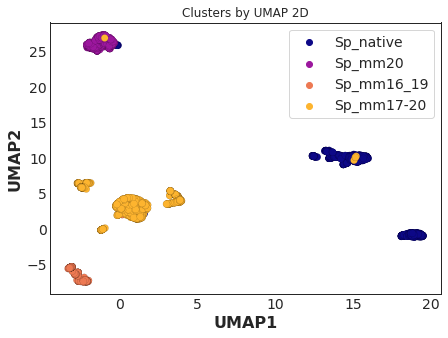

In [17]:
# Set your own colors for the plot

color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']

# Set style to white and remove top and right spines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_sp, x='Comp1', y='Comp2', hue='Labels', palette=color_dict, edgecolor='black', s=30, linewidth=0.2)
sns.scatterplot(data=cent2_sp, x='Comp1', y='Comp2', hue='Labels', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=14)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('figures/SpCas9_onlyDNA_UMAP.svg')
plt.show()


In [16]:
cent2_sp.to_csv('UMAP_fel/SpCas9_umap_components_onlyDNA_features_EMX1.csv', index=False)

## UMAP for FnCas9 using DNA only features

In [31]:
fd1=pd.read_csv('Fn_NA_csvs/fn_nat_all.csv')
fd2=pd.read_csv('Fn_NA_csvs/fn_mm20_all_bps.csv')
fd3=pd.read_csv('Fn_NA_csvs/fn_16_19_all_bps.csv')
fd4=pd.read_csv('Fn_NA_csvs/fn_mm17-20_all_bps.csv')
fd2.head()

,fn_mm20_shear_20,fn_mm20_stretch_20,fn_mm20_stagger_20,fn_mm20_buckle_20,fn_mm20_propeller_20,fn_mm20_opening_20,fn_mm20_shear_19,fn_mm20_stretch_19,fn_mm20_stagger_19,fn_mm20_buckle_19,...,fn_mm20_stagger_18,fn_mm20_buckle_18,fn_mm20_propeller_18,fn_mm20_opening_18,fn_mm20_shear_17,fn_mm20_stretch_17,fn_mm20_stagger_17,fn_mm20_buckle_17,fn_mm20_propeller_17,fn_mm20_opening_17
0,-2.17,2.77,-0.82,15.75,30.26,-139.67,-4.25,2.30,-1.36,-7.26,...,0.56,11.12,-7.48,-2.38,-0.04,0.15,-0.20,-6.44,-3.03,11.26
1,-2.56,2.06,1.18,20.60,54.07,-103.94,-7.40,3.29,-2.49,35.00,...,0.81,4.04,-12.56,1.18,0.05,0.45,0.34,0.91,-25.18,13.69
2,-2.72,2.77,-0.92,10.68,20.35,-136.35,-7.76,3.64,-2.30,22.60,...,0.02,10.60,-0.25,-2.36,0.27,-0.08,0.35,11.11,-13.77,5.27
3,-3.95,2.90,-2.23,-2.28,12.73,-125.69,-7.91,3.65,-2.38,24.28,...,-0.25,-9.67,-2.63,-3.89,-0.06,0.05,-0.65,6.89,-17.08,8.90
4,-1.53,3.06,-0.28,42.79,28.85,-159.07,-7.66,3.51,-2.35,2.24,...,-0.18,-1.67,-7.95,-1.48,0.17,-0.14,-0.72,7.62,-12.56,-0.61


In [32]:
print(fd1.columns, fd2.columns, fd3.columns, fd4.columns)

Index(['fn_20_shear', 'fn_20_stretch', 'fn_20_stagger', 'fn_20_buckle',
       'fn_20_propeller', 'fn_20_opening', 'fn_20_major', 'fn_20_minor',
       'fn_19_shear', 'fn_19_stretch', 'fn_19_stagger', 'fn_19_buckle',
       'fn_19_propeller', 'fn_19_opening', 'fn_19_major', 'fn_19_minor',
       'fn_18_shear', 'fn_18_stretch', 'fn_18_stagger', 'fn_18_buckle',
       'fn_18_propeller', 'fn_18_opening', 'fn_18_major', 'fn_18_minor',
       'fn_17_shear', 'fn_17_stretch', 'fn_17_stagger', 'fn_17_buckle',
       'fn_17_propeller', 'fn_17_opening', 'fn_17_major', 'fn_17_minor'],
      dtype='object') Index(['fn_mm20_shear_20', 'fn_mm20_stretch_20', 'fn_mm20_stagger_20',
       'fn_mm20_buckle_20', 'fn_mm20_propeller_20', 'fn_mm20_opening_20',
       'fn_mm20_shear_19', 'fn_mm20_stretch_19', 'fn_mm20_stagger_19',
       'fn_mm20_buckle_19', 'fn_mm20_propeller_19', 'fn_mm20_opening_19',
       'fn_mm20_shear_18', 'fn_mm20_stretch_18', 'fn_mm20_stagger_18',
       'fn_mm20_buckle_18', 'fn_mm20

In [33]:
# # Drop major and minor width columns from the dataframe
fd1=fd1.drop(columns=['fn_20_major', 'fn_20_minor','fn_19_major', 'fn_19_minor','fn_18_major', 'fn_18_minor','fn_17_major', 'fn_17_minor'], axis=1)
#fd3=fd3.drop(columns=['fn_mm16-19_shear_16', 'fn_mm16-19_stretch_16', 'fn_mm16-19_stagger_16','fn_mm16-19_buckle_16', 'fn_mm16-19_propeller_16','fn_mm16-19_opening_16'],axis=1)
#name

In [34]:
#li_rd=[]
li_nat=[]
li_mm20=[]
li_mm16_19=[]
li_mm17_20=[]

print(len(fd1), len(fd2),len(fd3),len(fd4))
# fd1=fd1.iloc[:len(fd4),:]
# fd2=fd2.iloc[:len(fd4),:]
# fd3=fd3.iloc[:len(fd4),:]
# fd4=fd4.iloc[:len(fd4),:]

fd1.columns = range(fd1.shape[1])
fd2.columns = range(fd2.shape[1])
fd3.columns = range(fd3.shape[1])
fd4.columns = range(fd4.shape[1])
fd4.columns = range(fd4.shape[1])


for i in range(len(fd1)):
    li_nat.append('Fn_native')

for i in range(len(fd2)):
    li_mm20.append('Fn_mm20')

for i in range(len(fd3)):
    li_mm16_19.append('Fn_mm16_19')
    

fd1['Labels']=li_nat
fd2['Labels']=li_mm20
fd3['Labels']=li_mm16_19


print(len(fd1), len(fd2),len(fd3),len(fd4))

1000 1030 1001 974
1000 1030 1001 974


In [36]:
# FnCas9 tSNE plots
from sklearn.impute import SimpleImputer
impute_mode_all = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
print(len(fd4))
li_3=fd3.columns
li_4=fd4.columns
fd3.iloc[:,:-1] = impute_mode_all.fit_transform(fd3.iloc[:,:-1])
fd4.iloc[:,:-1] = impute_mode_all.fit_transform(fd4.iloc[:,:-1])
fd3=pd.DataFrame(fd3,columns=li_3)
fd4=pd.DataFrame(fd4,columns=li_4)

for i in range(len(fd4)):
    li_mm17_20.append('Fn_mm17-20')
fd4['Labels']=li_mm17_20

974


In [38]:
name=['fn_all_bp20_shear','fn_all_bp20_stretch','fn_all_bp20_stagger','fn_all_bp20_buckle','fn_all_bp20_propeller','fn_all_bp20_opening','fn_all_bp19_shear','fn_all_bp19_stretch','fn_all_bp19_stagger','fn_all_bp19_buckle','fn_all_bp19_propeller','fn_all_bp19_opening','fn_all_bp18_shear','fn_all_bp18_stretch','fn_all_bp18_stagger','fn_all_bp18_buckle','fn_all_bp18_propeller','fn_all_bp18_opening','fn_all_bp17_shear','fn_all_bp17_stretch','fn_all_bp17_stagger','fn_all_bp17_buckle','fn_all_bp17_propeller','fn_all_bp17_opening','Label']
fn_na=pd.DataFrame()
fn_na=pd.concat([fd1,fd2,fd3,fd4])
fn_na.columns=name
fn_na.to_csv('native_non-native_conts/FnCas9-NA-str-prop.csv', index=False)

fds=[fd1,fd2,fd3,fd4]
fn_fd=pd.concat(fds)
fn_fd.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Labels
0,0.1408,-0.0382,-1.3359,-19.6877,-10.6982,1.8632,-0.3675,-0.2017,0.3782,-15.9436,...,16.1937,-3.3366,2.8914,-0.1677,0.0683,-0.6784,1.9567,-20.7789,5.7232,Fn_native
1,0.0108,-0.1267,-0.3147,0.3161,-5.7110,-0.9128,-0.0118,-0.1110,-0.5896,-4.6094,...,5.8993,5.5636,-2.8305,-0.3641,-0.1131,-0.6782,-5.1537,-8.1574,6.3623,Fn_native
2,-0.2054,-0.1976,-0.7486,-10.5384,-4.5533,-2.9501,0.8082,-0.0305,-0.4288,-5.7831,...,3.7903,-9.6770,-2.7676,-0.6249,0.1418,-0.1010,-14.0028,-6.4134,2.8343,Fn_native
3,0.2342,0.0370,-1.5965,-27.9567,-4.1443,1.6322,0.4008,0.2634,-0.5393,-25.5657,...,-14.5341,-5.5643,-2.5665,-0.1326,-0.0352,0.4002,-5.5481,-17.7710,5.5987,Fn_native
4,-0.6152,-0.0678,-0.5083,-11.8724,1.9054,2.4655,0.1610,-0.0284,-0.2799,1.9262,...,15.1480,4.5122,-3.7907,-0.0610,0.1159,-0.4802,-3.2074,-14.9974,10.9517,Fn_native


In [39]:
# fn_fd.info()
# fn_fd=fn_fd.astype(float)
fn_fd.iloc[:,:-1]=fn_fd.iloc[:,:-1].astype(float)
fn_fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 0 to 973
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3145 non-null   float64
 1   1       3145 non-null   float64
 2   2       3145 non-null   float64
 3   3       3145 non-null   float64
 4   4       3145 non-null   float64
 5   5       3145 non-null   float64
 6   6       2980 non-null   float64
 7   7       2980 non-null   float64
 8   8       2980 non-null   float64
 9   9       2980 non-null   float64
 10  10      2980 non-null   float64
 11  11      2980 non-null   float64
 12  12      4005 non-null   float64
 13  13      4005 non-null   float64
 14  14      4005 non-null   float64
 15  15      4005 non-null   float64
 16  16      4005 non-null   float64
 17  17      4005 non-null   float64
 18  18      3945 non-null   float64
 19  19      3945 non-null   float64
 20  20      3945 non-null   float64
 21  21      3945 non-null   float64
 22  2

In [40]:
from umap import UMAP
import plotly.express as px
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp = Imputer(strategy="mean", axis=0)
scaler=StandardScaler()

## Pair-wise Silhoutte Score Calculation

In [41]:
fn_nat20=pd.concat([fd1,fd2])
fn_nat16_19=pd.concat([fd1,fd3])
fn_nat17_20=pd.concat([fd1,fd4])
fn_nat20.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Labels
0,0.1408,-0.0382,-1.3359,-19.6877,-10.6982,1.8632,-0.3675,-0.2017,0.3782,-15.9436,...,16.1937,-3.3366,2.8914,-0.1677,0.0683,-0.6784,1.9567,-20.7789,5.7232,Fn_native
1,0.0108,-0.1267,-0.3147,0.3161,-5.7110,-0.9128,-0.0118,-0.1110,-0.5896,-4.6094,...,5.8993,5.5636,-2.8305,-0.3641,-0.1131,-0.6782,-5.1537,-8.1574,6.3623,Fn_native
2,-0.2054,-0.1976,-0.7486,-10.5384,-4.5533,-2.9501,0.8082,-0.0305,-0.4288,-5.7831,...,3.7903,-9.6770,-2.7676,-0.6249,0.1418,-0.1010,-14.0028,-6.4134,2.8343,Fn_native
3,0.2342,0.0370,-1.5965,-27.9567,-4.1443,1.6322,0.4008,0.2634,-0.5393,-25.5657,...,-14.5341,-5.5643,-2.5665,-0.1326,-0.0352,0.4002,-5.5481,-17.7710,5.5987,Fn_native
4,-0.6152,-0.0678,-0.5083,-11.8724,1.9054,2.4655,0.1610,-0.0284,-0.2799,1.9262,...,15.1480,4.5122,-3.7907,-0.0610,0.1159,-0.4802,-3.2074,-14.9974,10.9517,Fn_native


In [43]:
def find_best_umap_parameters(df_fn_all):
    # Assuming you have your data stored in 'df_fn_all'
    # import plotly.express as px
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(df_fn_all.iloc[:, :-1]))

    # Define the range of values for n_neighbors and min_dist
    n_neighbors_values = list(np.arange(100, 200, 5))  # Modify as desired
    min_dist_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Modify as desired

    best_silhouette_score = float('-inf')
    best_n_neighbors = None
    best_min_dist = None

    for n_neighbors in n_neighbors_values:
        for min_dist in min_dist_values:
            umap_2d = UMAP(n_components=2, init='random', random_state=0,
                           n_neighbors=n_neighbors, min_dist=min_dist, metric='manhattan')
            fn_umap = umap_2d.fit_transform(segmentation_std)
            df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
            #df_umap['Label'] = df_fn_all.iloc[:, -1]
            scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
            silhouette = silhouette_score(scores_umap, df_fn_all.iloc[:, -1], metric='manhattan')

            print(f"n_neighbors: {n_neighbors}, min_dist: {min_dist}, Silhouette Score: {silhouette}")

            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_n_neighbors = n_neighbors
                best_min_dist = min_dist

    print("Best Silhouette Score:", best_silhouette_score)
    print("Best n_neighbors:", best_n_neighbors)
    print("Best min_dist:", best_min_dist)


In [16]:
# n_range = np.arange(50, 200, 5)
# sil_scores, db_scores, best_params = find_best_umap_params(fn_fd, fn_fd.iloc[:,-1], n_range)
find_best_umap_parameters(fn_fd)

n_neighbors: 100, min_dist: 0.0, Silhouette Score: 0.643387723675979
n_neighbors: 100, min_dist: 0.1, Silhouette Score: 0.6163331591957966
n_neighbors: 100, min_dist: 0.2, Silhouette Score: 0.5333353933447592
n_neighbors: 100, min_dist: 0.3, Silhouette Score: 0.5980701194245887
n_neighbors: 100, min_dist: 0.4, Silhouette Score: 0.40905666445000555
n_neighbors: 100, min_dist: 0.5, Silhouette Score: 0.5104376620069203
n_neighbors: 105, min_dist: 0.0, Silhouette Score: 0.5618846245000501
n_neighbors: 105, min_dist: 0.1, Silhouette Score: 0.5519899381226047
n_neighbors: 105, min_dist: 0.2, Silhouette Score: 0.5786444010421091
n_neighbors: 105, min_dist: 0.3, Silhouette Score: 0.5819302685360708
n_neighbors: 105, min_dist: 0.4, Silhouette Score: 0.4776356662443862
n_neighbors: 105, min_dist: 0.5, Silhouette Score: 0.49963414885379287
n_neighbors: 110, min_dist: 0.0, Silhouette Score: 0.6759489809032471
n_neighbors: 110, min_dist: 0.1, Silhouette Score: 0.5305672074541927
n_neighbors: 110, m

n_neighbors: 195, min_dist: 0.4, Silhouette Score: 0.5900151082176419
n_neighbors: 195, min_dist: 0.5, Silhouette Score: 0.45677792390023536
Best Silhouette Score: 0.6915902089518882
Best n_neighbors: 165
Best min_dist: 0.3


In [43]:
def calculate_umap_silscore_fn(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-1]))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=165, min_dist=0.3, metric='manhattan')
    fn_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(fn_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [44]:
#Pair-wise Sil score for Fn-native and mm20
#calculate_umap_silscore_fn(fn_fd,fn_fd['Labels'])
calculate_umap_silscore_fn(fn_nat20,fn_nat20['Labels'])
calculate_umap_silscore_fn(fn_nat16_19,fn_nat16_19['Labels'])
calculate_umap_silscore_fn(fn_nat17_20,fn_nat17_20['Labels'])

UMAP Silhouette Score: 0.8754337183656954
UMAP Silhouette Score: 0.655835309652892
UMAP Silhouette Score: 0.8660772052470906


0.8660772052470906

In [89]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(imp.fit_transform(fn_fd.iloc[:,:-1]))

umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=165, min_dist=0.3, metric='manhattan')
fn_umap = umap_2d.fit_transform(segmentation_std)

cent = pd.DataFrame(fn_umap, columns=['Comp1','Comp2'])
scores_umap = cent[['Comp1','Comp2']].to_numpy()

score = silhouette_score(scores_umap, fn_fd.iloc[:,-1], metric='manhattan')

print("UMAP Silhouette Score:", score)

UMAP Silhouette Score: 0.6915902089518882


In [29]:
import plotly.express as px
# scaler=StandardScaler()
# segmentation_std=scaler.fit_transform(fn_fd.iloc[:,:-1])
segmentation_std = scaler.fit_transform(imp.fit_transform(fn_fd.iloc[:,:-1]))
sil_fn=[]
db_fn=[]
ch_fn=[]
dict_fn={}
for n in (np.arange(50,200,5)):
    #tsne_2d = TSNE(n_components=2, verbose=1, perplexity=n, random_state=123,n_iter=1000)
    #tsne_3d = TSNE(n_components=3, verbose=1, perplexity=n, random_state=123,n_iter=1000)
    umap_2d=UMAP(n_components=2, init='random', random_state=0,n_neighbors=n, min_dist=0.3,metric='manhattan')
    fn_tsne = umap_2d.fit_transform(segmentation_std) 
    cent2=pd.DataFrame(fn_tsne, columns=['Comp1','Comp2'])
    scores_tsne=cent2[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array
    score = silhouette_score(scores_tsne, fn_fd['Labels'], metric='euclidean')
    db_index = davies_bouldin_score(scores_tsne, fn_fd['Labels'])
    ch_score=metrics.calinski_harabasz_score(scores_tsne, fn_fd['Labels'])
    db_fn.append(db_index)
    sil_fn.append(score)
    ch_fn.append(ch_score)
    dict_fn[n]=[score,db_index,ch_score]
# Print the score
    print('Perplexity Value',n) 
    print('Silhouetter Score: %.3f' % score)
    #fig_2d = px.scatter(fn_tsne, x=0, y=1,color=sp_df.Labels)
    #fig_2d.show()

Perplexity Value 50
Silhouetter Score: 0.394
Perplexity Value 55
Silhouetter Score: 0.474
Perplexity Value 60
Silhouetter Score: 0.454
Perplexity Value 65
Silhouetter Score: 0.452
Perplexity Value 70
Silhouetter Score: 0.626
Perplexity Value 75
Silhouetter Score: 0.408
Perplexity Value 80
Silhouetter Score: 0.530
Perplexity Value 85
Silhouetter Score: 0.634
Perplexity Value 90
Silhouetter Score: 0.452
Perplexity Value 95
Silhouetter Score: 0.489
Perplexity Value 100
Silhouetter Score: 0.566
Perplexity Value 105
Silhouetter Score: 0.571
Perplexity Value 110
Silhouetter Score: 0.396
Perplexity Value 115
Silhouetter Score: 0.461
Perplexity Value 120
Silhouetter Score: 0.527
Perplexity Value 125
Silhouetter Score: 0.444
Perplexity Value 130
Silhouetter Score: 0.469
Perplexity Value 135
Silhouetter Score: 0.603
Perplexity Value 140
Silhouetter Score: 0.458
Perplexity Value 145
Silhouetter Score: 0.574
Perplexity Value 150
Silhouetter Score: 0.580
Perplexity Value 155
Silhouetter Score: 0.46

In [45]:
#Plot with best n_neighbours=145 and min_dist = 0.0
segmentation_std = scaler.fit_transform(imp.fit_transform(fn_fd.iloc[:,:-1]))
umap_2d=UMAP(n_components=2, init='random', random_state=0,n_neighbors=145, min_dist=0.0,metric='manhattan') # best sil score at this n_neighbours
fn_tsne = umap_2d.fit_transform(segmentation_std) 
proj_2d = umap_2d.fit_transform(segmentation_std)
cent2_fn=pd.DataFrame(fn_tsne, columns=['Comp1','Comp2'])
cent2_fn['Labels']=list(fn_fd.iloc[:,-1])
scores_tsne=cent2_fn[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array
print(silhouette_score(scores_tsne, fn_fd['Labels'], metric='manhattan'))
#     fig_2d = px.scatter(proj_2d, x=0, y=1,color=fn_fd.Labels)
#     fig_2d.show()

0.5281990924648787


In [47]:
cent2_fn.head()
li=[]
li1=[list(np.arange(1,1001)),list(np.arange(1,1031)),list(np.arange(1,1002)),list(np.arange(1,975))]
for i in li1:
    li.extend(i)
cent2_fn['Frames']=li
# df_tsne_kmeans['Frames']=np.arange(1, len(df_tsne_kmeans)+1)
cent2_fn.head()

,Comp1,Comp2,Labels,Frames
0,8.851728,12.600511,Fn_native,1
1,9.666142,12.883730,Fn_native,2
2,9.171317,12.023129,Fn_native,3
3,9.054995,11.763751,Fn_native,4
4,9.782467,12.550721,Fn_native,5


<Figure size 432x288 with 0 Axes>

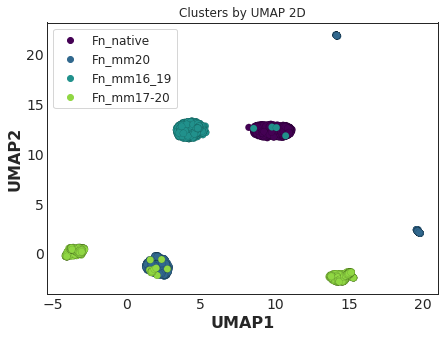

In [58]:
# Set your own colors for the plot
color_dict=['#440154','#31688e','#21918c','#90d743']
#color_dict=['#7A316F','#CD6688','#176B87','#90d743']
# Set style to white and remove top and right spines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_fn, x='Comp1', y='Comp2', hue='Labels', palette=color_dict, edgecolor='black', s=40, linewidth=0.2)
sns.scatterplot(data=cent2_fn, x='Comp1', y='Comp2', hue='Labels', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=12)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('figures/FnCas9_onlyDNA_UMAP.svg')
plt.show()


In [72]:
cent2_fn.to_csv('UMAP_fel/FnCas9_umap_components_onlyDNA_features_EMX1.csv', index=False)
cent2_fn.head()

,Comp1,Comp2,Label
0,17.912312,14.156236,Fn_native
1,2.753095,-4.674960,Fn_native
2,2.759418,-4.711111,Fn_native
3,2.734030,-4.775877,Fn_native
4,2.754512,-4.764625,Fn_native


## Preparing features for SpCas9

In [290]:
# For SpCas9 merging all data into single dataframe
df_na=pd.read_csv('native_non-native_conts/SpCas9-NA-str-prop.csv')
out=pd.read_csv('native_non-native_conts/LIE-Sp-all-sgrna-tdna-300-500ns.csv')
rmsd=pd.read_csv('native_non-native_conts/SpCas9-duplex_all-hybrid_RMSD.csv')
rg=pd.read_csv('native_non-native_conts/SpCas9_all-protein_ROG.csv')
sasa=pd.read_csv('native_non-native_conts/SpCas9_all-protein_SASA.csv')
angle=pd.read_csv('native_non-native_conts/SpCas9_all-angle_300-500ns.csv')
cont=pd.read_csv('native_non-native_conts/SpCas9_all-sgRNA-tDNA_conts.csv')

cont_dna=pd.read_csv('native_non-native_conts/SpCas9_DNA-Hybrid_contacts.csv')
# ele_surf=pd.read_csv('SpCas9_all_interface_electrostatistics.csv')
hnh_hy=pd.read_csv('native_non-native_conts/SpCas9_HNH-Hybrid_contacts.csv')
rec1_hy=pd.read_csv('native_non-native_conts/SpCas9_REC1-Hybrid_contacts.csv')
rec2_hy=pd.read_csv('native_non-native_conts/SpCas9_REC2-Hybrid_contacts.csv')
rec3_hy=pd.read_csv('native_non-native_conts/SpCas9_REC3-Hybrid_contacts.csv')
ruvc_hy=pd.read_csv('native_non-native_conts/SpCas9_RuvC-Hybrid_contacts.csv')

In [291]:
print(len(df_na), len(rmsd),len(rg), len(sasa), len(angle), len(cont), len(out))

2925 2000 3448 3448 3862 3862 3862


In [292]:
cont.head()

,Label,sgRNA-tDNA cont
0,Sp_native,836.0
1,Sp_native,531.0
2,Sp_native,488.0
3,Sp_native,450.0
4,Sp_native,452.0


In [293]:
li1=list(df_na['Label'].unique())
li2=list(rmsd['Label'].unique())
li3=list(rg['Label'].unique())
li4=list(sasa['Label'].unique())
li5=list(angle['Label'].unique())
li6=li1=list(cont['Label'].unique())
li7=li1=list(out['Label'].unique())
frames1=[]
frames2=[]
frames3=[]
frames4=[]
frames5=[]
frames6=[]
frames7=[]

#for i in range(len(df_na)):
for j in li1:
    #print(j)
    val=np.arange(1,len(df_na[df_na['Label']==j])+1)
    for k in val:
        f=j+"-"+str(k)
        frames1.append(f)
df_na['Frames']=frames1
df_na.drop(['Label'], axis=1, inplace=True)
df_na.head()

for j in li2:
    #print(j)
    val=np.arange(1,len(rmsd[rmsd['Label']==j])+1)
    for k in val:
        f=j+"-"+str(k)
        frames2.append(f)
rmsd['Frames']=frames2
rmsd.drop(['Label'], axis=1, inplace=True)
rmsd.head()

for j in li3:
    #print(j)
    val=np.arange(1,len(rg[rg['Label']==j])+1)
    for k in val:
        f=j+"-"+str(k)
        frames3.append(f)
rg['Frames']=frames3
rg.drop(['Label'], axis=1, inplace=True)
rg.head()

for j in li4:
    #print(j)
    val=np.arange(1,len(sasa[sasa['Label']==j])+1)
    for k in val:
        f=j+"-"+str(k)
        frames4.append(f)
sasa['Frames']=frames4
sasa.drop(['Label'], axis=1, inplace=True)
sasa.head()

for j in li5:
    #print(j)
    val=np.arange(1,len(angle[angle['Label']==j])+1)
    for k in val:
        f=j+"-"+str(k)
        frames5.append(f)
angle['Frames']=frames5
angle.drop(['Label'], axis=1, inplace=True)
angle.head()

for j in li6:
    #print(j)
    val=np.arange(1,len(cont[cont['Label']==j])+1)
    for k in val:
        f=j+"-"+str(k)
        frames6.append(f)
cont['Frames']=frames6
cont.drop(['Label'], axis=1, inplace=True)
cont.head()

for j in li7:
    #print(j)
    val=np.arange(1,len(out[out['Label']==j])+1)
    for k in val:
        f=j+"-"+str(k)
        frames7.append(f)
out['Frames']=frames7
out.drop(['Label'], axis=1, inplace=True)
out.head()

,LIE,Frames
0,-233.7180,Sp_native-1
1,-225.2096,Sp_native-2
2,-209.1789,Sp_native-3
3,-223.1380,Sp_native-4
4,-212.9919,Sp_native-5


In [294]:
hnh_hy.drop('Unnamed: 0', axis=1,inplace=True)
rec1_hy.drop('Unnamed: 0', axis=1,inplace=True)
rec2_hy.drop('Unnamed: 0', axis=1,inplace=True)
rec3_hy.drop('Unnamed: 0', axis=1,inplace=True)
cont_dna.drop('Unnamed: 0', axis=1,inplace=True)
ruvc_hy.drop('Unnamed: 0', axis=1,inplace=True)

In [295]:
cont_dna.head()

,Sp-ntDNA-tDNA_native,Sp-ntDNA-tDNA-RuvC_non-native,Frames
0,467,0,Sp_native-1
1,394,101,Sp_native-2
2,392,128,Sp_native-3
3,363,138,Sp_native-4
4,354,129,Sp_native-5


In [296]:
df_na.head()

,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,sp_all_bp19_buckle,...,sp_all_bp18_buckle,sp_all_bp18_propeller,sp_all_bp18_opening,sp_all_bp17_shear,sp_all_bp17_stretch,sp_all_bp17_stagger,sp_all_bp17_buckle,sp_all_bp17_propeller,sp_all_bp17_opening,Frames
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,3.3395,6.6069,6.6553,-0.4333,-0.1624,0.7862,22.2872,31.1506,-1.1153,Sp_native-1
1,-1.9338,-0.2674,-0.5556,-27.4271,-2.9507,-1.4088,-1.1249,-2.0598,-0.4141,163.8870,...,3.6978,1.2315,2.2936,-0.2467,-0.0627,0.2854,15.8367,21.5744,0.2816,Sp_native-2
2,-1.9522,-0.3215,-1.5388,-37.7302,0.1344,-4.8676,0.0000,0.0000,0.0000,0.0000,...,-12.1020,14.0883,-0.1628,0.2160,0.0381,-0.1403,23.2042,19.3277,-1.7907,Sp_native-3
3,-1.6764,-0.2989,-2.2130,-41.6397,3.3360,-12.7670,-0.3408,-0.8056,-0.0288,144.4887,...,-16.5550,-5.0665,2.4141,-0.0148,0.0068,0.9877,-5.3736,40.7062,-3.4361,Sp_native-4
4,-2.0473,-0.4995,-1.2528,-29.2144,5.8491,-10.4067,-0.6070,-1.5472,-0.0846,150.0707,...,2.8481,6.4141,6.6592,0.0221,-0.0568,0.4948,23.8849,25.0668,-3.6689,Sp_native-5


In [297]:
input_df=df_na.merge(angle, on="Frames", how="inner").merge(sasa, on="Frames", how="inner").merge(rg, on="Frames", how="inner").merge(cont, on="Frames", how="inner").merge(out, on="Frames", how="inner")
input_df.head()

,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,sp_all_bp19_buckle,...,sp_all_bp17_stagger,sp_all_bp17_buckle,sp_all_bp17_propeller,sp_all_bp17_opening,Frames,Angle,SASA,ROG,sgRNA-tDNA cont,LIE
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,0.7862,22.2872,31.1506,-1.1153,Sp_native-1,78.2061,55513.435342,37.941324,836.0,-233.7180
1,-1.9338,-0.2674,-0.5556,-27.4271,-2.9507,-1.4088,-1.1249,-2.0598,-0.4141,163.8870,...,0.2854,15.8367,21.5744,0.2816,Sp_native-2,80.4279,55799.665117,38.080920,531.0,-225.2096
2,-1.9522,-0.3215,-1.5388,-37.7302,0.1344,-4.8676,0.0000,0.0000,0.0000,0.0000,...,-0.1403,23.2042,19.3277,-1.7907,Sp_native-3,79.6113,55945.596513,38.124924,488.0,-209.1789
3,-1.6764,-0.2989,-2.2130,-41.6397,3.3360,-12.7670,-0.3408,-0.8056,-0.0288,144.4887,...,0.9877,-5.3736,40.7062,-3.4361,Sp_native-4,80.2607,55851.497079,38.096988,450.0,-223.1380
4,-2.0473,-0.4995,-1.2528,-29.2144,5.8491,-10.4067,-0.6070,-1.5472,-0.0846,150.0707,...,0.4948,23.8849,25.0668,-3.6689,Sp_native-5,78.5890,55594.273536,37.889846,452.0,-212.9919


In [298]:
input_df2=input_df.merge(cont_dna,on="Frames", how="inner").merge(hnh_hy,on="Frames", how="inner").merge(rec1_hy,on="Frames", how="inner").merge(rec2_hy,on="Frames", how="inner").merge(rec3_hy,on="Frames", how="inner").merge(ruvc_hy,on="Frames", how="inner")

In [299]:
input_df2.head()

,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,sp_all_bp19_buckle,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,223,0,743,0,45,0,876,0,733,0
1,-1.9338,-0.2674,-0.5556,-27.4271,-2.9507,-1.4088,-1.1249,-2.0598,-0.4141,163.8870,...,147,74,576,177,18,24,501,232,517,248
2,-1.9522,-0.3215,-1.5388,-37.7302,0.1344,-4.8676,0.0000,0.0000,0.0000,0.0000,...,166,81,447,167,18,14,539,318,470,305
3,-1.6764,-0.2989,-2.2130,-41.6397,3.3360,-12.7670,-0.3408,-0.8056,-0.0288,144.4887,...,140,54,473,140,20,41,508,336,410,261
4,-2.0473,-0.4995,-1.2528,-29.2144,5.8491,-10.4067,-0.6070,-1.5472,-0.0846,150.0707,...,157,66,523,208,15,32,486,245,417,212


In [300]:
input_df2.to_csv('final_input_output_SpCas9_EMX1.csv', index= False)

## Preparing features for FnCas9

In [141]:
# For FnCas9 merging all data into single dataframe
df_na=pd.read_csv('native_non-native_conts/FnCas9-NA-str-prop.csv')
out=pd.read_csv('native_non-native_conts/LIE-fn-all_sgRNA-tDNA-300-500ns.csv')
rmsd=pd.read_csv('native_non-native_conts/FnCas9_all-hybrid_RMSD.csv')
rg=pd.read_csv('native_non-native_conts/FnCas9_all-protein_ROG.csv')
sasa=pd.read_csv('native_non-native_conts/FnCas9_all-protein_SASA.csv')
angle=pd.read_csv('native_non-native_conts/FnCas9_all-angle_300-500ns.csv')
cont=pd.read_csv('native_non-native_conts/FnCas9_all-sgRNA-tDNA_conts.csv')
cont_dna=pd.read_csv('native_non-native_conts/FnCas9_DNA-Hybrid_contacts.csv')
# ele_surf=pd.read_csv('FnCas9_all_interface_electrostatistics.csv')
hnh_hy=pd.read_csv('native_non-native_conts/FnCas9_HNH-Hybrid_contacts.csv')
rec1_hy=pd.read_csv('native_non-native_conts/FnCas9_REC1-Hybrid_contacts.csv')
rec2_hy=pd.read_csv('native_non-native_conts/FnCas9_REC2-Hybrid_contacts.csv')
rec3_hy=pd.read_csv('native_non-native_conts/FnCas9_REC3-Hybrid_contacts.csv')
ruvc_hy=pd.read_csv('native_non-native_conts/FnCas9_RuvC-Hybrid_contacts.csv')

In [142]:
import numpy as np

def generate_frames(df, column_name):
    unique_labels = list(df[column_name].unique())
    frames = []
    for label in unique_labels:
        values = np.arange(1, len(df[df[column_name] == label]) + 1)
        for value in values:
            frame = f"{label}-{value}"
            frames.append(frame)
    df['Frames'] = frames
    df.drop([column_name], axis=1, inplace=True)
    return df


In [143]:
df_na

,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,fn_all_bp19_shear,fn_all_bp19_stretch,fn_all_bp19_stagger,fn_all_bp19_buckle,...,fn_all_bp18_buckle,fn_all_bp18_propeller,fn_all_bp18_opening,fn_all_bp17_shear,fn_all_bp17_stretch,fn_all_bp17_stagger,fn_all_bp17_buckle,fn_all_bp17_propeller,fn_all_bp17_opening,Label
0,0.1408,-0.0382,-1.3359,-19.6877,-10.6982,1.8632,-0.3675,-0.2017,0.3782,-15.9436,...,16.1937,-3.3366,2.8914,-0.1677,0.0683,-0.6784,1.9567,-20.7789,5.7232,Fn_native
1,0.0108,-0.1267,-0.3147,0.3161,-5.7110,-0.9128,-0.0118,-0.1110,-0.5896,-4.6094,...,5.8993,5.5636,-2.8305,-0.3641,-0.1131,-0.6782,-5.1537,-8.1574,6.3623,Fn_native
2,-0.2054,-0.1976,-0.7486,-10.5384,-4.5533,-2.9501,0.8082,-0.0305,-0.4288,-5.7831,...,3.7903,-9.6770,-2.7676,-0.6249,0.1418,-0.1010,-14.0028,-6.4134,2.8343,Fn_native
3,0.2342,0.0370,-1.5965,-27.9567,-4.1443,1.6322,0.4008,0.2634,-0.5393,-25.5657,...,-14.5341,-5.5643,-2.5665,-0.1326,-0.0352,0.4002,-5.5481,-17.7710,5.5987,Fn_native
4,-0.6152,-0.0678,-0.5083,-11.8724,1.9054,2.4655,0.1610,-0.0284,-0.2799,1.9262,...,15.1480,4.5122,-3.7907,-0.0610,0.1159,-0.4802,-3.2074,-14.9974,10.9517,Fn_native
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,-22.9600,-29.9000,10.9500,-0.1100,-0.0500,0.0100,34.3200,-0.3300,-3.2200,Fn_mm17-20
4001,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,-22.9600,-29.9000,10.9500,-0.5900,0.0000,0.8000,35.8000,12.8000,-0.6400,Fn_mm17-20
4002,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,-22.9600,-29.9000,10.9500,-0.0300,0.0300,0.7200,17.0400,7.3200,-1.4300,Fn_mm17-20
4003,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,-22.9600,-29.9000,10.9500,-0.1400,0.1200,0.1700,27.9900,9.6700,1.0800,Fn_mm17-20


In [144]:
df_na = generate_frames(df_na, 'Label')

In [145]:
#df_na = generate_frames(df_na, 'Label')
rmsd = generate_frames(rmsd, 'Label')
rg = generate_frames(rg, 'Label')
sasa = generate_frames(sasa, 'Label')
angle = generate_frames(angle, 'Label')
cont = generate_frames(cont, 'Label')
out = generate_frames(out, 'Label')

In [146]:
hnh_hy.drop('Unnamed: 0', axis=1,inplace=True)
rec1_hy.drop('Unnamed: 0', axis=1,inplace=True)
rec2_hy.drop('Unnamed: 0', axis=1,inplace=True)
rec3_hy.drop('Unnamed: 0', axis=1,inplace=True)
cont_dna.drop('Unnamed: 0', axis=1,inplace=True)
ruvc_hy.drop('Unnamed: 0', axis=1,inplace=True)

In [147]:
input_df=df_na.merge(angle, on="Frames", how="inner").merge(sasa, on="Frames", how="inner").merge(rg, on="Frames", how="inner").merge(cont, on="Frames", how="inner").merge(out, on="Frames", how="inner")
input_df.head()

,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,fn_all_bp19_shear,fn_all_bp19_stretch,fn_all_bp19_stagger,fn_all_bp19_buckle,...,fn_all_bp17_stagger,fn_all_bp17_buckle,fn_all_bp17_propeller,fn_all_bp17_opening,Frames,Angle,SASA,ROG,sgRNA-tDNA cont,LIE
0,0.1408,-0.0382,-1.3359,-19.6877,-10.6982,1.8632,-0.3675,-0.2017,0.3782,-15.9436,...,-0.6784,1.9567,-20.7789,5.7232,Fn_native-1,109.0130,66942.508303,42.558150,815.0,-443.9571
1,0.0108,-0.1267,-0.3147,0.3161,-5.7110,-0.9128,-0.0118,-0.1110,-0.5896,-4.6094,...,-0.6782,-5.1537,-8.1574,6.3623,Fn_native-2,111.1196,66957.382244,41.786148,669.0,-485.9711
2,-0.2054,-0.1976,-0.7486,-10.5384,-4.5533,-2.9501,0.8082,-0.0305,-0.4288,-5.7831,...,-0.1010,-14.0028,-6.4134,2.8343,Fn_native-3,111.2391,66865.677648,42.060966,624.0,-465.1823
3,0.2342,0.0370,-1.5965,-27.9567,-4.1443,1.6322,0.4008,0.2634,-0.5393,-25.5657,...,0.4002,-5.5481,-17.7710,5.5987,Fn_native-4,109.2878,67017.870851,41.957582,649.0,-445.4878
4,-0.6152,-0.0678,-0.5083,-11.8724,1.9054,2.4655,0.1610,-0.0284,-0.2799,1.9262,...,-0.4802,-3.2074,-14.9974,10.9517,Fn_native-5,110.3565,66770.012327,41.910865,620.0,-461.5993


In [148]:
input_df2=input_df.merge(cont_dna,on="Frames", how="inner").merge(hnh_hy,on="Frames", how="inner").merge(rec1_hy,on="Frames", how="inner").merge(rec2_hy,on="Frames", how="inner").merge(rec3_hy,on="Frames", how="inner").merge(ruvc_hy,on="Frames", how="inner")

In [149]:
input_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 1997
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fn_all_bp20_shear         1668 non-null   float64
 1   fn_all_bp20_stretch       1668 non-null   float64
 2   fn_all_bp20_stagger       1668 non-null   float64
 3   fn_all_bp20_buckle        1668 non-null   float64
 4   fn_all_bp20_propeller     1668 non-null   float64
 5   fn_all_bp20_opening       1668 non-null   float64
 6   fn_all_bp19_shear         1503 non-null   float64
 7   fn_all_bp19_stretch       1503 non-null   float64
 8   fn_all_bp19_stagger       1503 non-null   float64
 9   fn_all_bp19_buckle        1503 non-null   float64
 10  fn_all_bp19_propeller     1503 non-null   float64
 11  fn_all_bp19_opening       1503 non-null   float64
 12  fn_all_bp18_shear         1998 non-null   float64
 13  fn_all_bp18_stretch       1998 non-null   float64
 14  fn_all_b

In [150]:
input_df2.to_csv('final_input_output_FnCas9_EMX1.csv', index= False)

# UMAP using DNA and Protein features (SASA, RMSD, ROG, sgRNA-tDNA, ntDNA-tDNA, Domains with hybrid conts, LIE, Angle for 300-500ns , 1000 frames)

In [51]:
df_sp_all=pd.read_csv('final_input_output_SpCas9_EMX1.csv')
df_fn_all=pd.read_csv('final_input_output_FnCas9_EMX1.csv') # replace mm17-20 to mm17_20

In [52]:
df_sp_all.head()

,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,sp_all_bp19_buckle,...,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,223,0,743,0,45,0,876,0,733,0
1,-1.9338,-0.2674,-0.5556,-27.4271,-2.9507,-1.4088,-1.1249,-2.0598,-0.4141,163.8870,...,147,74,576,177,18,24,501,232,517,248
2,-1.9522,-0.3215,-1.5388,-37.7302,0.1344,-4.8676,0.0000,0.0000,0.0000,0.0000,...,166,81,447,167,18,14,539,318,470,305
3,-1.6764,-0.2989,-2.2130,-41.6397,3.3360,-12.7670,-0.3408,-0.8056,-0.0288,144.4887,...,140,54,473,140,20,41,508,336,410,261
4,-2.0473,-0.4995,-1.2528,-29.2144,5.8491,-10.4067,-0.6070,-1.5472,-0.0846,150.0707,...,157,66,523,208,15,32,486,245,417,212


In [53]:
df_sp_all['Label']=df_sp_all['Frames'].str.split('-', expand=True)[0]
df_sp_all.drop('Frames', axis=1, inplace=True)

In [54]:
df_fn_all['Label']=df_fn_all['Frames'].str.split('-', expand=True)[0]
df_fn_all.drop('Frames', axis=1, inplace=True)

In [55]:
# Split a Frames columns using '-' separator
df_sp_all.head()

,sp_all_bp20_shear,sp_all_bp20_stretch,sp_all_bp20_stagger,sp_all_bp20_buckle,sp_all_bp20_propeller,sp_all_bp20_opening,sp_all_bp19_shear,sp_all_bp19_stretch,sp_all_bp19_stagger,sp_all_bp19_buckle,...,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native,Label
0,-2.0421,-0.1780,-1.0560,-31.9772,-1.7352,-4.9460,-0.6412,-1.8257,-0.5815,148.5415,...,0,743,0,45,0,876,0,733,0,Sp_native
1,-1.9338,-0.2674,-0.5556,-27.4271,-2.9507,-1.4088,-1.1249,-2.0598,-0.4141,163.8870,...,74,576,177,18,24,501,232,517,248,Sp_native
2,-1.9522,-0.3215,-1.5388,-37.7302,0.1344,-4.8676,0.0000,0.0000,0.0000,0.0000,...,81,447,167,18,14,539,318,470,305,Sp_native
3,-1.6764,-0.2989,-2.2130,-41.6397,3.3360,-12.7670,-0.3408,-0.8056,-0.0288,144.4887,...,54,473,140,20,41,508,336,410,261,Sp_native
4,-2.0473,-0.4995,-1.2528,-29.2144,5.8491,-10.4067,-0.6070,-1.5472,-0.0846,150.0707,...,66,523,208,15,32,486,245,417,212,Sp_native


In [56]:
df_sp_all['Label'].unique()

array(['Sp_native', 'Sp_mm20', 'Sp_mm17', 'Sp_mm16_19'], dtype=object)

In [57]:
sp_nat=df_sp_all[df_sp_all['Label']=='Sp_native']
sp_mm20=df_sp_all[df_sp_all['Label']=='Sp_mm20']
sp_mm16_19=df_sp_all[df_sp_all['Label']=='Sp_mm16_19']
sp_mm17_20=df_sp_all[df_sp_all['Label']=='Sp_mm17']
sp_nat_20=pd.concat([sp_nat,sp_mm20])
sp_nat_16_19=pd.concat([sp_nat,sp_mm16_19])
sp_nat_17_20=pd.concat([sp_nat,sp_mm17_20])
#sp_nat_20=sp_nat_20.iloc[:,:-1]
sp_nat_20.columns = range(sp_nat_20.shape[1])
#sp_nat_16_19=sp_nat_16_19.iloc[:,:-1]
sp_nat_16_19.columns = range(sp_nat_16_19.shape[1])
#sp_nat_17_20=sp_nat_17_20.iloc[:,:-1]
sp_nat_17_20.columns = range(sp_nat_17_20.shape[1])
sp_nat_17_20.tail()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
2277,NaN,NaN,NaN,NaN,NaN,NaN,-5.37,1.76,-1.90,-12.92,...,25,408,517,20,34,288,584,206,350,Sp_mm17
2278,NaN,NaN,NaN,NaN,NaN,NaN,0.74,-0.20,-0.08,-9.91,...,8,404,413,25,28,272,588,203,447,Sp_mm17
2279,NaN,NaN,NaN,NaN,NaN,NaN,-5.08,1.87,-0.96,-50.74,...,24,414,466,20,79,301,722,215,373,Sp_mm17
2280,NaN,NaN,NaN,NaN,NaN,NaN,-8.16,3.22,-0.11,40.34,...,17,371,421,19,98,276,616,192,410,Sp_mm17
2281,NaN,NaN,NaN,NaN,NaN,NaN,0.95,-0.15,0.07,-19.52,...,26,375,541,17,70,259,496,194,396,Sp_mm17


In [58]:
df_fn_all

,fn_all_bp20_shear,fn_all_bp20_stretch,fn_all_bp20_stagger,fn_all_bp20_buckle,fn_all_bp20_propeller,fn_all_bp20_opening,fn_all_bp19_shear,fn_all_bp19_stretch,fn_all_bp19_stagger,fn_all_bp19_buckle,...,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native,Label
0,0.1408,-0.0382,-1.3359,-19.6877,-10.6982,1.8632,-0.3675,-0.2017,0.3782,-15.9436,...,0,539,0,1928,0,1143,0,146,0,Fn_native
1,0.0108,-0.1267,-0.3147,0.3161,-5.7110,-0.9128,-0.0118,-0.1110,-0.5896,-4.6094,...,123,370,280,1371,714,767,322,94,48,Fn_native
2,-0.2054,-0.1976,-0.7486,-10.5384,-4.5533,-2.9501,0.8082,-0.0305,-0.4288,-5.7831,...,113,368,248,1347,753,744,343,109,56,Fn_native
3,0.2342,0.0370,-1.5965,-27.9567,-4.1443,1.6322,0.4008,0.2634,-0.5393,-25.5657,...,152,405,228,1352,711,791,361,85,58,Fn_native
4,-0.6152,-0.0678,-0.5083,-11.8724,1.9054,2.4655,0.1610,-0.0284,-0.2799,1.9262,...,107,357,195,1276,806,788,450,109,53,Fn_native
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,110,365,362,1102,1363,689,772,51,48,Fn_mm17
1994,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,100,393,401,1138,1406,715,839,60,26,Fn_mm17
1995,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,105,365,370,1124,1324,683,668,57,18,Fn_mm17
1996,-0.8500,5.0800,-0.1400,-37.8100,-34.2000,-75.8100,-7.7800,2.9200,-1.2700,-35.1700,...,110,389,348,1101,1388,720,710,68,37,Fn_mm17


In [3]:
fn_nat=df_fn_all[df_fn_all['Label']=='Fn_native']
fn_mm20=df_fn_all[df_fn_all['Label']=='Fn_mm20']
fn_mm16_19=df_fn_all[df_fn_all['Label']=='Fn_mm16_19']
fn_mm17_20=df_fn_all[df_fn_all['Label']=='Fn_mm17_20']
fn_nat_20=pd.concat([fn_nat,fn_mm20])
fn_nat_16_19=pd.concat([fn_nat,fn_mm16_19])
fn_nat_17_20=pd.concat([fn_nat,fn_mm17_20])
#fn_nat_20=fn_nat_20.iloc[:,:-1]
fn_nat_20.columns = range(fn_nat_20.shape[1])
#fn_nat_16_19=fn_nat_16_19.iloc[:,:-1]
fn_nat_16_19.columns = range(fn_nat_16_19.shape[1])
#fn_nat_17_20=fn_nat_17_20.iloc[:,:-1]

In [61]:
from umap import UMAP
import plotly.express as px
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler=StandardScaler()

In [62]:
# Remove header 
df_sp_all.columns = range(df_sp_all.shape[1])
df_fn_all.columns = range(df_fn_all.shape[1])

In [205]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
df_sp_all['Label']=df_sp_all.iloc[:,-1]
segmentation_std = scaler.fit_transform(imp.fit_transform(df_sp_all.iloc[:,:-2]))

# Define the range of values for n_neighbors and min_dist
n_neighbors_values = list(np.arange(20,200,5))  # Modify as desired
min_dist_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Modify as desired

best_silhouette_score = float('-inf')
best_n_neighbors = None
best_min_dist = None

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        umap_2d = UMAP(n_components=2, init='random', random_state=0,
                       n_neighbors=n_neighbors, min_dist=min_dist, metric='manhattan')
        sp_umap = umap_2d.fit_transform(segmentation_std)
        df_umap = pd.DataFrame(sp_umap, columns=['Comp1', 'Comp2'])
        df_umap['Label'] = df_sp_all.iloc[:, -1]
        scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
        silhouette = silhouette_score(scores_umap, df_sp_all.iloc[:, -1], metric='manhattan')
        
        print(f"n_neighbors: {n_neighbors}, min_dist: {min_dist}, Silhouette Score: {silhouette}")
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_n_neighbors = n_neighbors
            best_min_dist = min_dist

print("Best Silhouette Score:", best_silhouette_score)
print("Best n_neighbors:", best_n_neighbors)
print("Best min_dist:", best_min_dist)


n_neighbors: 20, min_dist: 0.0, Silhouette Score: 0.3690697717620412
n_neighbors: 20, min_dist: 0.1, Silhouette Score: 0.23355116144016705
n_neighbors: 20, min_dist: 0.2, Silhouette Score: 0.2565322654619681
n_neighbors: 20, min_dist: 0.3, Silhouette Score: 0.3153730737548235
n_neighbors: 20, min_dist: 0.4, Silhouette Score: 0.3275489002613103
n_neighbors: 20, min_dist: 0.5, Silhouette Score: 0.4010919106676519
n_neighbors: 25, min_dist: 0.0, Silhouette Score: 0.34358263651757787
n_neighbors: 25, min_dist: 0.1, Silhouette Score: 0.33306179786133183
n_neighbors: 25, min_dist: 0.2, Silhouette Score: 0.5108744403930472
n_neighbors: 25, min_dist: 0.3, Silhouette Score: 0.35117229677366135
n_neighbors: 25, min_dist: 0.4, Silhouette Score: 0.4937470116342933
n_neighbors: 25, min_dist: 0.5, Silhouette Score: 0.198649206882148
n_neighbors: 30, min_dist: 0.0, Silhouette Score: 0.5107687430206017
n_neighbors: 30, min_dist: 0.1, Silhouette Score: 0.25642295572975354
n_neighbors: 30, min_dist: 0.2

n_neighbors: 115, min_dist: 0.4, Silhouette Score: 0.6038221720337545
n_neighbors: 115, min_dist: 0.5, Silhouette Score: 0.6666447273491257
n_neighbors: 120, min_dist: 0.0, Silhouette Score: 0.5666720889568001
n_neighbors: 120, min_dist: 0.1, Silhouette Score: 0.4015755236720348
n_neighbors: 120, min_dist: 0.2, Silhouette Score: 0.44149804216491795
n_neighbors: 120, min_dist: 0.3, Silhouette Score: 0.5242976419373153
n_neighbors: 120, min_dist: 0.4, Silhouette Score: 0.6253912596699926
n_neighbors: 120, min_dist: 0.5, Silhouette Score: 0.46035902464083917
n_neighbors: 125, min_dist: 0.0, Silhouette Score: 0.6330286861815243
n_neighbors: 125, min_dist: 0.1, Silhouette Score: 0.6453821847921429
n_neighbors: 125, min_dist: 0.2, Silhouette Score: 0.6005375446501647
n_neighbors: 125, min_dist: 0.3, Silhouette Score: 0.4542462804534335
n_neighbors: 125, min_dist: 0.4, Silhouette Score: 0.49987571906741307
n_neighbors: 125, min_dist: 0.5, Silhouette Score: 0.6270877586377475
n_neighbors: 130,

In [65]:
def calculate_umap_silscore_sp(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-1]))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=175, min_dist=0.4, metric='manhattan')
    sp_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(sp_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [67]:
#Silhoute score b/w native native and mm20
calculate_umap_silscore_sp(sp_nat_20, sp_nat_20.iloc[:,-1])
calculate_umap_silscore_sp(sp_nat_16_19, sp_nat_16_19.iloc[:,-1])
calculate_umap_silscore_sp(sp_nat_17_20, sp_nat_17_20.iloc[:,-1])

UMAP Silhouette Score: 0.9428737040397558
UMAP Silhouette Score: 0.8837012462997765
UMAP Silhouette Score: 0.4122111461229845


0.4122111461229845

In [68]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
df_sp_all['Label']=df_sp_all.iloc[:,-1]
segmentation_std = scaler.fit_transform(imp.fit_transform(df_sp_all.iloc[:,:-2]))

umap_2d=UMAP(n_components=2, init='random', random_state=0, n_neighbors=175, min_dist=0.4, metric='manhattan') # best sil score at this n_neighbours
sp_tsne = umap_2d.fit_transform(segmentation_std) 
proj_2d = umap_2d.fit_transform(segmentation_std)
cent2_sp=pd.DataFrame(sp_tsne, columns=['Comp1','Comp2'])
cent2_sp['Label']=list(df_sp_all.iloc[:,-1])
scores_tsne=cent2_sp[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array
print(silhouette_score(scores_tsne, df_sp_all.iloc[:,-1]))

0.8652222


In [73]:
cent2_sp.to_csv('UMAP_fel/SpCas9_umap_components_all_features_EMX1.csv', index=False)

<Figure size 432x288 with 0 Axes>

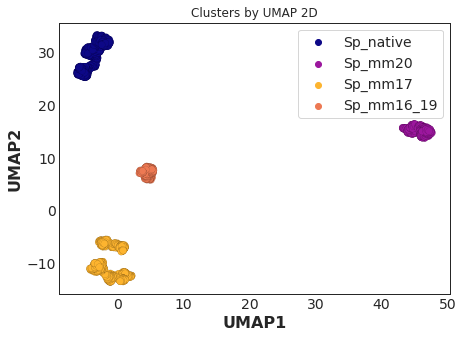

In [83]:
color_dict=['#0d0887','#9c179e','#fdb42f','#ed7953']

# Set style to white and remove top and right spines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_sp, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=30, linewidth=0.2)
sns.scatterplot(data=cent2_sp, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=14)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('figures/SpCas9_all_UMAP.svg')

## UMAP for FnCas9 (all features)

In [344]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from umap import UMAP

# Assuming you have your data stored in 'df_fn_all'
import plotly.express as px
# scaler=StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
df_fn_all['Label']=df_fn_all.iloc[:,-1]
segmentation_std = scaler.fit_transform(imp.fit_transform(df_fn_all.iloc[:,:-2]))

# Define the range of values for n_neighbors and min_dist
n_neighbors_values = list(np.arange(20,200,5))  # Modify as desired
min_dist_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Modify as desired

best_silhouette_score = float('-inf')
best_n_neighbors = None
best_min_dist = None

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        umap_2d = UMAP(n_components=2, init='random', random_state=0,
                       n_neighbors=n_neighbors, min_dist=min_dist, metric='manhattan')
        fn_umap = umap_2d.fit_transform(segmentation_std)
        df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
        df_umap['Label'] = df_fn_all.iloc[:, -1]
        scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
        silhouette = silhouette_score(scores_umap, df_fn_all.iloc[:, -1], metric='manhattan')
        
        print(f"n_neighbors: {n_neighbors}, min_dist: {min_dist}, Silhouette Score: {silhouette}")
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_n_neighbors = n_neighbors
            best_min_dist = min_dist

print("Best Silhouette Score:", best_silhouette_score)
print("Best n_neighbors:", best_n_neighbors)
print("Best min_dist:", best_min_dist)


n_neighbors: 20, min_dist: 0.0, Silhouette Score: 0.7262490845694561
n_neighbors: 20, min_dist: 0.1, Silhouette Score: 0.7440162525496252
n_neighbors: 20, min_dist: 0.2, Silhouette Score: 0.761550922201404
n_neighbors: 20, min_dist: 0.3, Silhouette Score: 0.6016350347882973
n_neighbors: 20, min_dist: 0.4, Silhouette Score: 0.5627053834832618
n_neighbors: 20, min_dist: 0.5, Silhouette Score: 0.5547477301909326
n_neighbors: 25, min_dist: 0.0, Silhouette Score: 0.5953424297606484
n_neighbors: 25, min_dist: 0.1, Silhouette Score: 0.7221666241645156
n_neighbors: 25, min_dist: 0.2, Silhouette Score: 0.7384803152714955
n_neighbors: 25, min_dist: 0.3, Silhouette Score: 0.5107755499341187
n_neighbors: 25, min_dist: 0.4, Silhouette Score: 0.7526829772802711
n_neighbors: 25, min_dist: 0.5, Silhouette Score: 0.6263363788829949
n_neighbors: 30, min_dist: 0.0, Silhouette Score: 0.7031543929305407
n_neighbors: 30, min_dist: 0.1, Silhouette Score: 0.8143749259573834
n_neighbors: 30, min_dist: 0.2, Sil

n_neighbors: 115, min_dist: 0.5, Silhouette Score: 0.8042937115829754
n_neighbors: 120, min_dist: 0.0, Silhouette Score: 0.887246763752775
n_neighbors: 120, min_dist: 0.1, Silhouette Score: 0.7897601173903473
n_neighbors: 120, min_dist: 0.2, Silhouette Score: 0.7157517572803729
n_neighbors: 120, min_dist: 0.3, Silhouette Score: 0.8474351259328168
n_neighbors: 120, min_dist: 0.4, Silhouette Score: 0.8582172813115124
n_neighbors: 120, min_dist: 0.5, Silhouette Score: 0.8679743996881291
n_neighbors: 125, min_dist: 0.0, Silhouette Score: 0.87171920341245
n_neighbors: 125, min_dist: 0.1, Silhouette Score: 0.7834010009918556
n_neighbors: 125, min_dist: 0.2, Silhouette Score: 0.8714238368729657
n_neighbors: 125, min_dist: 0.3, Silhouette Score: 0.8623940002347905
n_neighbors: 125, min_dist: 0.4, Silhouette Score: 0.8636942324839136
n_neighbors: 125, min_dist: 0.5, Silhouette Score: 0.772966080961516
n_neighbors: 130, min_dist: 0.0, Silhouette Score: 0.8586769190259791
n_neighbors: 130, min_di

In [336]:
def calculate_umap_silscore_fn(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-1]))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=170, min_dist=0.0, metric='manhattan')
    fn_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(fn_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [337]:
#Silhoute score b/w native native and mm20
calculate_umap_silscore_fn(fn_nat_20, fn_nat_20.iloc[:,-1])
calculate_umap_silscore_fn(fn_nat_16_19, fn_nat_16_19.iloc[:,-1])
calculate_umap_silscore_fn(fn_nat_17_20, fn_nat_17_20.iloc[:,-1])

UMAP Silhouette Score: 0.9507684259639321
UMAP Silhouette Score: 0.9252973184022639
UMAP Silhouette Score: 0.954784895145272


0.954784895145272

0.9178926


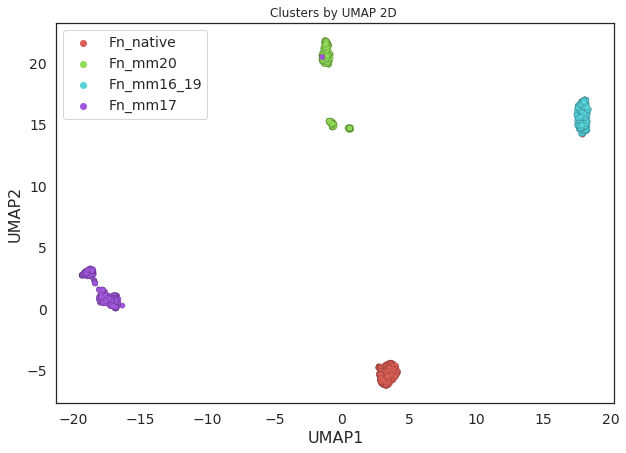

In [70]:
#Plot with best n_neighbours=145 and min_dist = 0.0
segmentation_std = scaler.fit_transform(imp.fit_transform(df_fn_all.iloc[:,:-2]))
umap_2d=UMAP(n_components=2, init='random', random_state=0,n_neighbors=170, min_dist=0.0,metric='manhattan') # best sil score at this n_neighbours
fn_tsne = umap_2d.fit_transform(segmentation_std) 
proj_2d = umap_2d.fit_transform(segmentation_std)
cent2_fn=pd.DataFrame(fn_tsne, columns=['Comp1','Comp2'])
cent2_fn['Label']=list(df_fn_all.iloc[:,-1])
scores_tsne=cent2_fn[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array
print(silhouette_score(scores_tsne, df_fn_all.iloc[:,-1]))
plt.figure(figsize=(10,7))
sns.scatterplot(cent2_fn, x='Comp1', y='Comp2', hue=cent2_fn['Label'], palette=sns.color_palette("hls", 4),edgecolor='black',s=30, linewidth=0.1)
plt.title('Clusters by UMAP 2D ')
plt.legend(fontsize=12)
plt.legend(fontsize=14)
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)
#plt.savefig('figures/UMAP_2D_FnCas9-DNAprop.svg')
plt.show()

In [71]:
cent2_fn.to_csv('UMAP_fel/FnCas9_umap_components_all_features_EMX1.csv', index=False)

<Figure size 432x288 with 0 Axes>

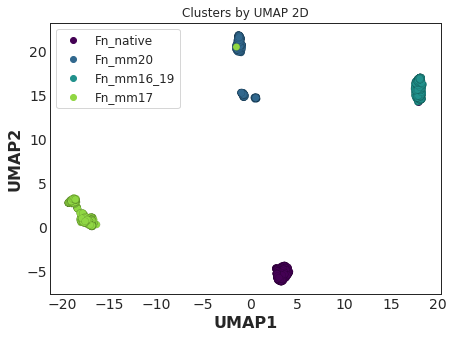

In [85]:
# Set your own colors for the plot
color_dict=['#440154','#31688e','#21918c','#90d743']
# Set style to white and remove top and right spines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_fn, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=20, linewidth=0.2)
sns.scatterplot(data=cent2_fn, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=12)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('figures/FnCas9_all_UMAP.svg')
plt.show()

## UMAP using only protein features

In [44]:
fn_prot=pd.read_csv('fn_nodt_files/ML_inputs/final_input_output_FnCas9_EMX1_nodt_only_protein.csv')
sp_prot=pd.read_csv('sp_nodt_files/ML_input/final_input_output_SpCas9_EMX1_nodt_only_protein.csv')

In [45]:
fn_prot.head()

,SASA,Label,ROG,RMSD,Angle,Fn-hy-HNH_native,Fn-hy-HNH_non-native,Fn-hy-REC1_native,Fn-hy-REC1_non-native,Fn-hy-REC2_native,Fn-hy-REC2_non-native,Fn-hy-REC3_native,Fn-hy-REC3_non-native,Fn-hy-RuvC_native,Fn-hy-RuvC_non-native
0,16966.1651,Fn_native-1,42.3083,0.0000,74.9050,203,0,595,0,1793,0,948,0,177,0
1,16274.8351,Fn_native-2,42.3648,3.6146,71.9931,149,50,459,131,1415,445,743,255,140,55
2,15949.5076,Fn_native-3,41.9093,3.9389,70.8587,133,37,457,182,1387,550,712,288,140,46
3,16626.5791,Fn_native-4,42.4010,3.7250,69.3978,96,37,473,138,1340,626,675,354,135,65
4,15875.5775,Fn_native-5,41.7911,3.8886,68.9098,114,23,443,170,1355,665,682,359,134,48


In [46]:
sp_prot.head()

,Angle,Frames,SASA,RMSD,ROG,Sp-hy-HNH_native,Sp-hy-HNH_non-native,Sp-hy-REC1_native,Sp-hy-REC1_non-native,Sp-hy-REC2_native,Sp-hy-REC2_non-native,Sp-hy-REC3_native,Sp-hy-REC3_non-native,Sp-hy-RuvC_native,Sp-hy-RuvC_non-native
0,103.3011,Sp_native-1,14157.2066,0.0000,38.5234,66,0,688,0,45,0,473,0,729,0
1,100.9966,Sp_native-2,13732.5256,3.9789,37.7180,50,40,522,142,30,5,366,167,500,269
2,101.1213,Sp_native-3,14321.8791,3.7594,38.0602,60,35,503,118,34,0,329,160,483,235
3,96.4444,Sp_native-4,13995.0482,4.0142,37.8444,53,36,466,105,35,15,356,165,536,279
4,98.1099,Sp_native-5,14417.0563,3.7774,38.0603,50,49,448,115,34,20,333,161,496,271


In [47]:
sp_prot['System']=sp_prot['Frames'].str.split('-', expand=True)[0]
sp_prot.drop('Frames', axis=1, inplace=True)

fn_prot['System']=fn_prot['Label'].str.split('-', expand=True)[0]
fn_prot.drop('Label', axis=1, inplace=True)

In [48]:
sp_prot.System.unique()

array(['Sp_native', 'Sp_mm20', 'Sp_mm17', 'Sp_mm16_19'], dtype=object)

In [49]:
fn_prot.System.unique()

array(['Fn_native', 'Fn_mm20', 'Fn_mm17', 'Fn_mm16_19'], dtype=object)

In [50]:
sp_nat=sp_prot[sp_prot['System']=='Sp_native']
sp_mm20=sp_prot[sp_prot['System']=='Sp_mm20']
sp_mm16_19=sp_prot[sp_prot['System']=='Sp_mm16_19']
sp_mm17_20=sp_prot[sp_prot['System']=='Sp_mm17']
sp_nat_20=pd.concat([sp_nat,sp_mm20])
sp_nat_16_19=pd.concat([sp_nat,sp_mm16_19])
sp_nat_17_20=pd.concat([sp_nat,sp_mm17_20])
#sp_nat_20=sp_nat_20.iloc[:,:-1]
sp_nat_20.columns = range(sp_nat_20.shape[1])
#sp_nat_16_19=sp_nat_16_19.iloc[:,:-1]
sp_nat_16_19.columns = range(sp_nat_16_19.shape[1])
#sp_nat_17_20=sp_nat_17_20.iloc[:,:-1]
sp_nat_17_20.columns = range(sp_nat_17_20.shape[1])
sp_nat_17_20.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
141690,93.1920,13373.0511,5.3358,38.1281,20,44,326,597,30,100,181,665,53,532,Sp_mm17
141691,93.3181,13801.8452,3.6314,38.3917,21,46,315,630,34,124,171,760,51,485,Sp_mm17
141692,95.3040,13798.5270,3.7196,38.4086,22,42,326,605,41,107,167,706,84,567,Sp_mm17
141693,93.8454,13584.8780,3.7697,38.4276,22,45,361,578,26,73,179,711,74,588,Sp_mm17
141694,94.5298,13999.3294,3.6674,38.3699,21,38,348,483,26,83,158,721,81,583,Sp_mm17


In [51]:
fn_nat=fn_prot[fn_prot['System']=='Fn_native']
fn_mm20=fn_prot[fn_prot['System']=='Fn_mm20']
fn_mm16_19=fn_prot[fn_prot['System']=='Fn_mm16_19']
fn_mm17_20=fn_prot[fn_prot['System']=='Fn_mm17']
fn_nat_20=pd.concat([fn_nat,fn_mm20])
fn_nat_16_19=pd.concat([fn_nat,fn_mm16_19])
fn_nat_17_20=pd.concat([fn_nat,fn_mm17_20])
#fn_nat_20=fn_nat_20.iloc[:,:-1]
fn_nat_20.columns = range(fn_nat_20.shape[1])
#fn_nat_16_19=fn_nat_16_19.iloc[:,:-1]
fn_nat_16_19.columns = range(fn_nat_16_19.shape[1])
#fn_nat_17_20=fn_nat_17_20.iloc[:,:-1]
fn_nat_17_20.columns = range(fn_nat_17_20.shape[1])
fn_nat_20.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
99647,16529.1747,42.5216,2.9271,63.5974,2,242,205,481,430,1270,325,499,1,138,Fn_mm20
99648,16194.1050,42.0540,3.9443,69.5328,0,289,189,511,385,1345,296,522,2,166,Fn_mm20
99649,16133.3466,41.9844,3.9772,71.6632,1,226,214,546,403,1286,289,456,2,159,Fn_mm20
99650,15988.0353,41.8610,4.8671,70.5834,2,231,189,538,351,1206,261,476,3,167,Fn_mm20
99651,16954.8709,42.2102,2.2906,71.1624,0,217,205,537,363,1123,277,385,3,144,Fn_mm20


In [52]:
from umap import UMAP
import plotly.express as px
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler=StandardScaler()
# Remove header 
sp_prot.columns = range(sp_prot.shape[1])
fn_prot.columns = range(fn_prot.shape[1])

In [39]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
sp_prot['System']=sp_prot.iloc[:,-1]
segmentation_std = scaler.fit_transform(imp.fit_transform(sp_prot.iloc[:,:-2]))

# Define the range of values for n_neighbors and min_dist
n_neighbors_values = list(np.arange(20,200,10))  # Modify as desired
min_dist_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Modify as desired

best_silhouette_score = float('-inf')
best_n_neighbors = None
best_min_dist = None

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        umap_2d = UMAP(n_components=2, init='random', random_state=0,
                       n_neighbors=n_neighbors, min_dist=min_dist, metric='manhattan')
        sp_umap = umap_2d.fit_transform(segmentation_std)
        df_umap = pd.DataFrame(sp_umap, columns=['Comp1', 'Comp2'])
        df_umap['Label'] = sp_prot.iloc[:, -1]
        scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
        silhouette = silhouette_score(scores_umap, sp_prot.iloc[:, -1], metric='manhattan')
        
        print(f"n_neighbors: {n_neighbors}, min_dist: {min_dist}, Silhouette Score: {silhouette}")
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_n_neighbors = n_neighbors
            best_min_dist = min_dist

print("Best Silhouette Score:", best_silhouette_score)
print("Best n_neighbors:", best_n_neighbors)
print("Best min_dist:", best_min_dist)

n_neighbors: 20, min_dist: 0.0, Silhouette Score: 0.21685077203604636
n_neighbors: 20, min_dist: 0.1, Silhouette Score: 0.3166957811207212
n_neighbors: 20, min_dist: 0.2, Silhouette Score: 0.17485956328973673
n_neighbors: 20, min_dist: 0.3, Silhouette Score: 0.14567653067390302
n_neighbors: 20, min_dist: 0.4, Silhouette Score: 0.14975790071275658
n_neighbors: 20, min_dist: 0.5, Silhouette Score: 0.1499822454796699
n_neighbors: 30, min_dist: 0.0, Silhouette Score: 0.19405505266353462
n_neighbors: 30, min_dist: 0.1, Silhouette Score: 0.19735013764602907
n_neighbors: 30, min_dist: 0.2, Silhouette Score: 0.2816621908323186
n_neighbors: 30, min_dist: 0.3, Silhouette Score: 0.13360140145334448
n_neighbors: 30, min_dist: 0.4, Silhouette Score: 0.1382253125317743
n_neighbors: 30, min_dist: 0.5, Silhouette Score: 0.16920935772496395
n_neighbors: 40, min_dist: 0.0, Silhouette Score: 0.2679612301506336
n_neighbors: 40, min_dist: 0.1, Silhouette Score: 0.22939708194478595
n_neighbors: 40, min_dist

In [40]:
def calculate_umap_silscore_sp(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-1]))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=150, min_dist=0.2, metric='manhattan')
    sp_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(sp_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [41]:
#Silhoute score b/w native native and mm20
calculate_umap_silscore_sp(sp_nat_20, sp_nat_20.iloc[:,-1])
calculate_umap_silscore_sp(sp_nat_16_19, sp_nat_16_19.iloc[:,-1])
calculate_umap_silscore_sp(sp_nat_17_20, sp_nat_17_20.iloc[:,-1])

UMAP Silhouette Score: 0.7414238674306884
UMAP Silhouette Score: 0.23930221178120056
UMAP Silhouette Score: 0.27075369610351024


0.27075369610351024

In [57]:
sp_prot.iloc[:,:-2]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,103.3011,14157.2066,0.0000,38.5234,66,0,688,0,45,0,473,0,729
1,100.9966,13732.5256,3.9789,37.7180,50,40,522,142,30,5,366,167,500
2,101.1213,14321.8791,3.7594,38.0602,60,35,503,118,34,0,329,160,483
3,96.4444,13995.0482,4.0142,37.8444,53,36,466,105,35,15,356,165,536
4,98.1099,14417.0563,3.7774,38.0603,50,49,448,115,34,20,333,161,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188922,102.5962,13746.5800,5.4219,37.5032,0,86,366,552,1,9,138,342,72
188923,94.3621,14488.0419,3.8215,37.7734,0,65,359,616,1,13,117,321,95
188924,98.6864,13658.2930,5.4426,37.4757,0,63,385,594,3,16,124,371,94
188925,101.6997,14277.4124,3.7466,37.7939,0,86,406,612,3,21,136,310,102


In [58]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
sp_prot['Label']=sp_prot.iloc[:,-1]
segmentation_std = scaler.fit_transform(imp.fit_transform(sp_prot.iloc[:,:-2]))

umap_2d=UMAP(n_components=2, init='random', random_state=0, n_neighbors=150, min_dist=0.2, metric='manhattan') # best sil score at this n_neighbours
sp_tsne = umap_2d.fit_transform(segmentation_std) 
proj_2d = umap_2d.fit_transform(segmentation_std)
cent2_sp=pd.DataFrame(sp_tsne, columns=['Comp1','Comp2'])
cent2_sp['Label']=list(sp_prot.iloc[:,-1])
scores_tsne=cent2_sp[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array
print(silhouette_score(scores_tsne, sp_prot.iloc[:,-1]))

0.4160812


In [60]:
cent2_sp.to_csv('UMAP_fel/SpCas9_umap_components_only_protein_features_EMX1.csv', index=False)

<Figure size 432x288 with 0 Axes>

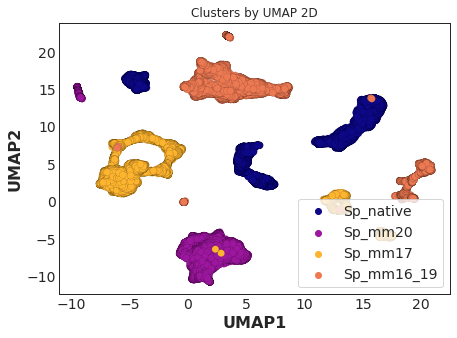

In [59]:
color_dict=['#0d0887','#9c179e','#fdb42f','#ed7953']

# Set style to white and remove top and right spines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_sp, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=30, linewidth=0.2)
sns.scatterplot(data=cent2_sp, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=14)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('figures/SpCas9_only_prot_UMAP.svg')

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from umap import UMAP

# Assuming you have your data stored in 'fn_prot'
import plotly.express as px
# scaler=StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
fn_prot['Label']=fn_prot.iloc[:,-1]
segmentation_std = scaler.fit_transform(imp.fit_transform(fn_prot.iloc[:,:-2]))

# Define the range of values for n_neighbors and min_dist
n_neighbors_values = list(np.arange(20,200,10))  # Modify as desired
min_dist_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Modify as desired

best_silhouette_score = float('-inf')
best_n_neighbors = None
best_min_dist = None

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        umap_2d = UMAP(n_components=2, init='random', random_state=0,
                       n_neighbors=n_neighbors, min_dist=min_dist, metric='manhattan')
        fn_umap = umap_2d.fit_transform(segmentation_std)
        df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
        df_umap['Label'] = fn_prot.iloc[:, -1]
        scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
        silhouette = silhouette_score(scores_umap, fn_prot.iloc[:, -1], metric='manhattan')
        
        print(f"n_neighbors: {n_neighbors}, min_dist: {min_dist}, Silhouette Score: {silhouette}")
        
        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_n_neighbors = n_neighbors
            best_min_dist = min_dist

print("Best Silhouette Score:", best_silhouette_score)
print("Best n_neighbors:", best_n_neighbors)
print("Best min_dist:", best_min_dist)


n_neighbors: 20, min_dist: 0.0, Silhouette Score: 0.3199619937824425
n_neighbors: 20, min_dist: 0.1, Silhouette Score: 0.2126262196166752
n_neighbors: 20, min_dist: 0.2, Silhouette Score: 0.24591933258395163
n_neighbors: 20, min_dist: 0.3, Silhouette Score: 0.2362720094057601
n_neighbors: 20, min_dist: 0.4, Silhouette Score: 0.1860704551995452
n_neighbors: 20, min_dist: 0.5, Silhouette Score: 0.10113853808484666
n_neighbors: 30, min_dist: 0.0, Silhouette Score: 0.20152350525101953
n_neighbors: 30, min_dist: 0.1, Silhouette Score: 0.34436750198079646
n_neighbors: 30, min_dist: 0.2, Silhouette Score: 0.14559815792713887
n_neighbors: 30, min_dist: 0.3, Silhouette Score: 0.3466619433367681
n_neighbors: 30, min_dist: 0.4, Silhouette Score: 0.19503903173510162
n_neighbors: 30, min_dist: 0.5, Silhouette Score: 0.20487707437371508
n_neighbors: 40, min_dist: 0.0, Silhouette Score: 0.34307305107698643
n_neighbors: 40, min_dist: 0.1, Silhouette Score: 0.29932541296517384
n_neighbors: 40, min_dist

In [62]:
def calculate_umap_silscore_fn(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-1]))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=150, min_dist=0.1, metric='manhattan')
    fn_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(fn_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [63]:
#Silhoute score b/w native native and mm20
calculate_umap_silscore_fn(fn_nat_20, fn_nat_20.iloc[:,-1])
calculate_umap_silscore_fn(fn_nat_16_19, fn_nat_16_19.iloc[:,-1])
calculate_umap_silscore_fn(fn_nat_17_20, fn_nat_17_20.iloc[:,-1])

UMAP Silhouette Score: 0.30474805181152237
UMAP Silhouette Score: 0.6561315618722453
UMAP Silhouette Score: 0.4254977005696797


0.4254977005696797

0.54079884


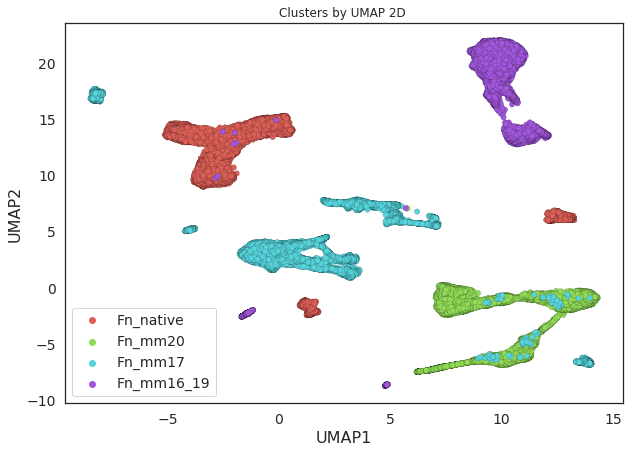

In [64]:
#Plot with best n_neighbours=145 and min_dist = 0.0
segmentation_std = scaler.fit_transform(imp.fit_transform(fn_prot.iloc[:,:-2]))
umap_2d=UMAP(n_components=2, init='random', random_state=0,n_neighbors=150, min_dist=0.1,metric='manhattan') # best sil score at this n_neighbours
fn_tsne = umap_2d.fit_transform(segmentation_std) 
proj_2d = umap_2d.fit_transform(segmentation_std)
cent2_fn=pd.DataFrame(fn_tsne, columns=['Comp1','Comp2'])
cent2_fn['Label']=list(fn_prot.iloc[:,-1])
scores_tsne=cent2_fn[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array
print(silhouette_score(scores_tsne, fn_prot.iloc[:,-1]))
plt.figure(figsize=(10,7))
sns.scatterplot(cent2_fn, x='Comp1', y='Comp2', hue=cent2_fn['Label'], palette=sns.color_palette("hls", 4),edgecolor='black',s=30, linewidth=0.1)
plt.title('Clusters by UMAP 2D ')
plt.legend(fontsize=12)
plt.legend(fontsize=14)
plt.xlabel('UMAP1',fontsize=16)
plt.ylabel('UMAP2',fontsize=16)
#plt.savefig('figures/UMAP_2D_FnCas9-DNAprop.svg')
plt.show()

In [66]:
cent2_fn.to_csv('UMAP_fel/FnCas9_umap_components_only_protein_features_EMX1.csv', index=False)

<Figure size 432x288 with 0 Axes>

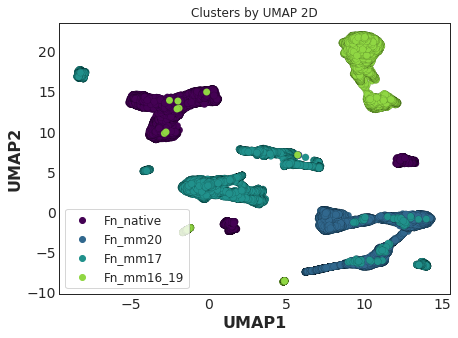

In [67]:
# Set your own colors for the plot
color_dict=['#440154','#31688e','#21918c','#90d743']
# Set style to white and remove top and right spines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_fn, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=20, linewidth=0.2)
sns.scatterplot(data=cent2_fn, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=12)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('figures/FnCas9_only-protein_UMAP.svg')
plt.show()

## Feature Ranking Analysis

In [64]:
xts=pd.read_csv('feature-ranking/xt_imp_spcas9.csv')
xtf=pd.read_csv('feature-ranking/xt_imp_fncas9.csv')

borf=pd.read_csv('feature-ranking/fn_all_bor.csv')
bors=pd.read_csv('feature-ranking/sp_bor_imp.csv')

In [65]:
borf=borf[borf['Decision']=='Accepted']
bors=bors[bors['Decision']=='Accepted']

In [66]:
xts=xts.rename(columns={'Importance':'Sp_Imp'})
xtf=xtf.rename(columns={'Importance':'Fn_Imp'})
merge=xtf.merge(xts, how="inner", on="Feature")
merge.head()

,Feature,Fn_Imp,Sp_Imp
0,REC3_non-native,0.112936,0.025967
1,REC1_native,0.077129,0.021254
2,REC3_native,0.053388,0.024475
3,bp20_stretch,0.046909,0.017099
4,HNH_native,0.044188,0.054893


In [67]:
bors.head()

,Methods,value,Decision
0,bp20_shear,0.140058,Accepted
1,bp20_shear,0.092623,Accepted
2,bp20_shear,0.213747,Accepted
3,bp20_shear,0.259432,Accepted
4,bp20_shear,0.135817,Accepted


In [68]:
mean_sp=bors.groupby('Methods')['value'].mean()
mean_sp['Methods']=mean_sp.index
sp_features=list(mean_sp.index)
sp_value=[]
for i in range(len(mean_sp)):
    sp_value.append(mean_sp[i])

bors2=pd.DataFrame({'Feature':sp_features,'Sp_MeanValue':sp_value})
bors2.head()

,Feature,Sp_MeanValue
0,HNH_native,1.065754
1,HNH_non-native,2.155538
2,REC1_native,-0.135608
3,REC1_non-native,0.175508
4,REC2_native,1.880067


In [56]:
bors2

,Features,Sp_MeanValue
0,HNH_native,1.065754
1,HNH_non-native,2.155538
2,REC1_native,-0.135608
3,REC1_non-native,0.175508
4,REC2_native,1.880067
5,REC2_non-native,-0.035337
6,REC3_native,0.999246
7,REC3_non-native,0.117148
8,RMSD,-0.17204
9,ROG,0.01798


In [69]:
mean_fn=borf.groupby('Methods')['value'].mean()
mean_fn['Methods']=mean_fn.index
fn_features=list(mean_fn.index)
fn_value=[]
for i in range(len(mean_fn)):
    fn_value.append(mean_fn[i])

borf2=pd.DataFrame({'Feature':fn_features,'Fn_MeanValue':fn_value})
borf2

,Feature,Fn_MeanValue
0,Angle,-0.164554
1,HNH_native,3.771764
2,HNH_non-native,0.690181
3,REC1_native,0.704049
4,REC1_non-native,0.265063
5,REC2_native,1.505695
6,REC2_non-native,-0.045126
7,REC3_native,0.492306
8,REC3_non-native,4.882853
9,RMSD,2.565523


In [70]:
merge2=bors2.merge(borf2, how="inner", on=['Feature'])
merge2=merge2[:-1]
merge2

,Feature,Sp_MeanValue,Fn_MeanValue
0,HNH_native,1.065754,3.771764
1,HNH_non-native,2.155538,0.690181
2,REC1_native,-0.135608,0.704049
3,REC1_non-native,0.175508,0.265063
4,REC2_native,1.880067,1.505695
5,REC2_non-native,-0.035337,-0.045126
6,REC3_native,0.999246,0.492306
7,REC3_non-native,0.117148,4.882853
8,RMSD,-0.17204,2.565523
9,ROG,0.01798,0.374215


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


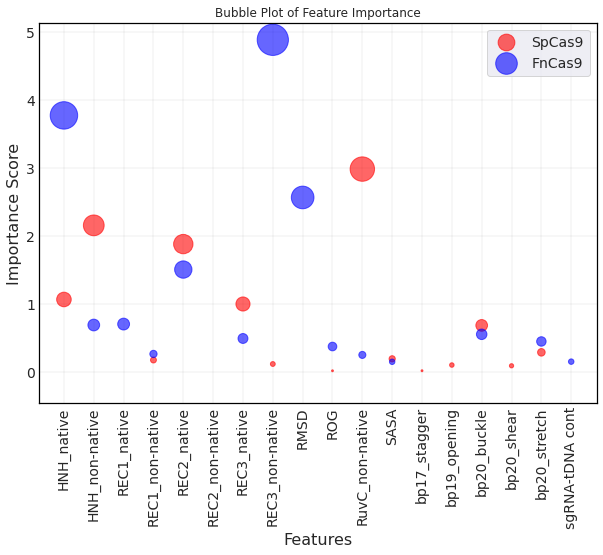

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Bubble plot
plt.figure(figsize=(10, 7))
merge2['Sp_MeanValue']=merge2['Sp_MeanValue'].astype(np.float64)
merge2['Fn_MeanValue']=merge2['Fn_MeanValue'].astype(np.float64)
# Plot for class 1
plt.scatter(merge2['Feature'], merge2['Sp_MeanValue'], s=np.array(merge2['Sp_MeanValue']) * 200, c='red', alpha=0.6, label='SpCas9')

# Plot for class 2
plt.scatter(merge2['Feature'], merge2['Fn_MeanValue'], s=np.array(merge2['Fn_MeanValue']) * 200, c='blue', alpha=0.6, label='FnCas9')


ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)

# Customize the plot
plt.title('Bubble Plot of Feature Importance')
plt.xlabel('Features',fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Importance Score',fontsize=16)
# plt.legend()
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend(fontsize=12)
plt.legend(fontsize=14)
plt.savefig('figures/boruta_feature-ranking-fn-sp.svg')
# Show the plot
plt.show()

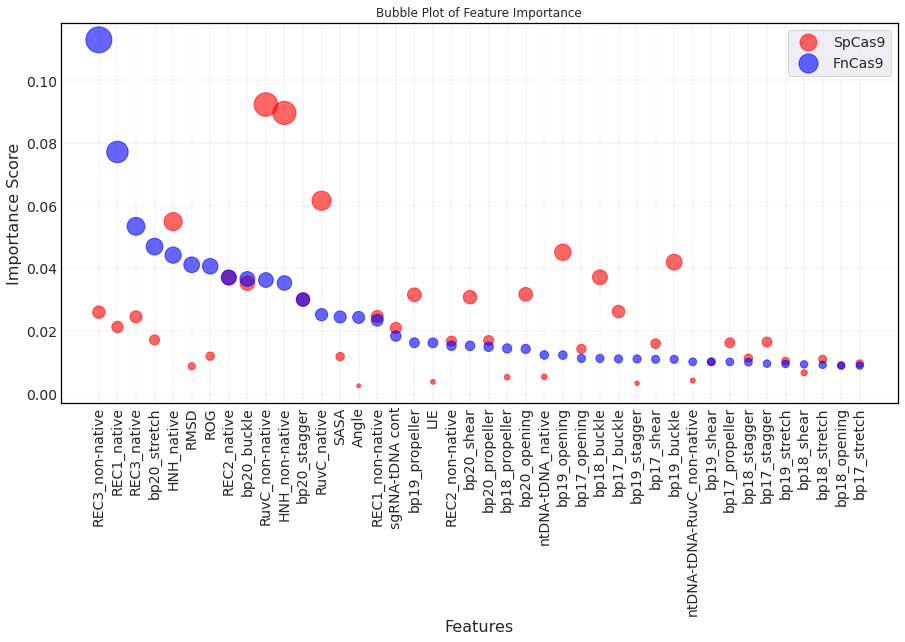

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Bubble plot
plt.figure(figsize=(15, 7), facecolor='white')

# Plot for class 1
plt.scatter(merge['Feature'], merge['Sp_Imp'], s=np.array(merge['Sp_Imp']) * 6000, c='red', alpha=0.6, label='SpCas9')

# Plot for class 2
plt.scatter(merge['Feature'], merge['Fn_Imp'], s=np.array(merge['Fn_Imp']) * 6000, c='blue', alpha=0.6, label='FnCas9')


ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)

# Customize the plot
plt.title('Bubble Plot of Feature Importance')
plt.xlabel('Features',fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Importance Score',fontsize=16)
# plt.legend()
# plt.grid(True)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.legend(fontsize=12)
plt.legend(fontsize=14)
plt.savefig('figures/extra-tree_feature-ranking-fn-sp.svg')
# Show the plot
plt.show()

In [78]:
merge.to_csv('feature-ranking/extra-tree-sp-fn.csv', index=False)

In [79]:
merge2.to_csv('feature-ranking/boruta-shap-sp-fn.csv', index=False)

In [80]:
merge3=merge2.merge(merge, how="inner", on='Feature')
merge3.head()

,Feature,Sp_MeanValue,Fn_MeanValue,Fn_Imp,Sp_Imp
0,HNH_native,1.065754,3.771764,0.044188,0.054893
1,HNH_non-native,2.155538,0.690181,0.035290,0.089583
2,REC1_native,-0.135608,0.704049,0.077129,0.021254
3,REC1_non-native,0.175508,0.265063,0.023396,0.024583
4,REC2_native,1.880067,1.505695,0.037083,0.036961


In [81]:
merge.head()

,Feature,Fn_Imp,Sp_Imp
0,REC3_non-native,0.112936,0.025967
1,REC1_native,0.077129,0.021254
2,REC3_native,0.053388,0.024475
3,bp20_stretch,0.046909,0.017099
4,HNH_native,0.044188,0.054893


In [82]:
merge2.head()

,Feature,Sp_MeanValue,Fn_MeanValue
0,HNH_native,1.065754,3.771764
1,HNH_non-native,2.155538,0.690181
2,REC1_native,-0.135608,0.704049
3,REC1_non-native,0.175508,0.265063
4,REC2_native,1.880067,1.505695


In [83]:
merge3.to_csv('feature-ranking/extra-tree-boruta-shap-sp-fn.csv', index=False)